###### WEEK 5 ONWARDS

In [1]:
import numpy as np
import pandas as pd
import os
import io
import warnings
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,precision_recall_curve
from sklearn.metrics import precision_score,recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

In [3]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)


KeyboardInterrupt: 

In [ ]:
x.shape,y.shape

In [ ]:
target=np.unique(y)

In [ ]:
X=x.to_numpy()
y=y.to_numpy()

In [ ]:
print(f"""
Number of samples: {X.shape[0]}, type {X.dtype}
Number of features: {X.shape[1]}
Minimum: {np.min(X)}, Maximum: {np.max(X)}
Number of classes: {len(target)}, type {y.dtype}
Labels: {target}
""")

In [ ]:
X=MinMaxScaler().fit_transform(X)
print(np.min(X),np.max(X))

In [ ]:
import matplotlib.pyplot as plt
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title(f'Label : {str(y[index+j])}')
        ax[i,j].set_axis_off()

In [ ]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train),binwidth=0.45,bins=11)
plt.xticks(ticks=list(range(10)),labels=list(range(10)))
plt.xlabel('Classs')
plt.title("Distribution of Samples")
plt.show()

## Binary Image classification (0 - Detector)

In [ ]:
y_train_0=-1*np.ones(len(y_train))
y_test_0=-1*np.ones(len(y_test))

indx_0=np.where(y_train == '0')
y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')
y_test_0[indx_0]=1

In [ ]:
import matplotlib.pyplot as plt
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title(f'Label : {str(y_train_0[index+j])}')
        ax[i,j].set_axis_off()

In [ ]:
num_pos=len(np.where(y_train_0==1)[0])
num_neg=len(np.where(y_train_0==-1)[0])
print(num_pos,num_neg)

In [ ]:
base_clf=DummyClassifier(strategy='most_frequent')

In [ ]:
base_clf.fit(x_train,y_train_0)
print("Training accuacy: {0:.2f}".format(base_clf.score(x_train,y_train_0)))
print("Test accuacy: {0:.2f}".format(base_clf.score(x_test,y_test_0)))

In [ ]:
bin_clf=Perceptron(max_iter=100,random_state=1729)

In [ ]:
bin_clf.fit(x_train,y_train_0)
print(bin_clf.coef_.shape)

In [ ]:
print(bin_clf.intercept_)
print(bin_clf.loss_function_)

In [ ]:
y_hat_train_0=bin_clf.predict(x_train)
print("Training Accuracy",bin_clf.score(x_train,y_train_0))

In [ ]:
print('test accuracy',bin_clf.score(x_test,y_test_0))

In [ ]:
y_hat_test_0=bin_clf.predict(x_test)
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*factor
    for j in range(factor):
        ax[i,j].imshow(x_test[index+j].reshape(28,28),cmap="gray")
        ax[i,j].set_title('Prediction: {}'.format(str(y_hat_test_0[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
indx_0=np.where(y_test_0==1)

In [ ]:
zeroImgs=x_test[indx_0[0]]
zeroLabls=y_hat_test_0[indx_0[0]]
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*factor
    for j in range(factor):
        ax[i,j].imshow(zeroImgs[index+j].reshape(28,28),cmap="gray")
        ax[i,j].set_title('Prediction: {}'.format(str(zeroLabls[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
num_misclassified=np.count_nonzero(zeroLabls==-1)
num_correctpred=len(zeroLabls)-num_misclassified
accuracy=num_correctpred/len(zeroLabls)
print(accuracy)

In [ ]:
# BETTER EVALUATION METRICS

In [ ]:
help(ConfusionMatrixDisplay.plot)

In [ ]:
#!pip install scikit-learn==1.0 --user

In [ ]:
y_hat_train_0=bin_clf.predict(x_train)
cm_display=ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
cf_matrix=cm_display.confusion_matrix
tn=cf_matrix[0,0]
fn=cf_matrix[1,0]
fp=cf_matrix[0,1]
tp=cf_matrix[1,1]

In [ ]:
precision=tp/(tp+fp)
print("Precision:",precision)
recall=tp/(tp+fn)
print("Recall:",recall)
accuracy=(tp+tn)/(tp+tn+fn+fp)
print("Accuracy",accuracy)

In [ ]:
bin_clf=Perceptron(max_iter=100,random_state=1729)
scores=cross_validate(bin_clf,x_train,y_train_0,cv=5,
                     scoring=['precision','recall','f1'],
                     return_estimator=True)
pprint(scores)

In [ ]:
print('f1               avg: {0:.2f}, std: {1:.3f}'.format(scores['test_f1'].mean(),scores['test_f1'].std()))
print('precision avg: {0:.2f}, std: {1:.3f}'.format(scores['test_precision'].mean(),scores['test_precision'].std()))
print('recall         avg: {0:.2f}, std: {1:.3f}'.format(scores['test_recall'].mean(),scores['test_recall'].std()))

In [ ]:
y_hat_train_0=cross_val_predict(bin_clf,x_train,y_train_0,cv=5)

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
cf_matrix=cm_display.confusion_matrix
tn=cf_matrix[0,0]
fn=cf_matrix[1,0]
fp=cf_matrix[0,1]
tp=cf_matrix[1,1]

In [ ]:
precision=tp/(tp+fp)
print("Precision:",precision)
recall=tp/(tp+fn)
print("Recall:",recall)
accuracy=(tp+tn)/(tp+tn+fn+fp)
print("Accuracy",accuracy)

In [ ]:
print('Precision %.2f'%precision_score(y_train_0,y_hat_train_0))
print("Recall %.2f"%recall_score(y_train_0,y_hat_train_0))
print('-'*50)
print(classification_report(y_train_0,y_hat_train_0))

In [ ]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(x_train,y_train_0)
y_scores=bin_clf.decision_function(x_train)
sns.histplot(np.sort(y_scores))
plt.show()

In [ ]:
precisions,recalls,thresholds=precision_recall_curve(y_train_0,y_scores,pos_label=1)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
idx_th=np.where(np.logical_and(thresholds >0, thresholds<1))
print("Precision for zero threshold:",precisions[idx_th[0][0]])

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr,tpr,thresholds=roc_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,linewidth=2,label='Perceptron')
plt.plot([0,1],[0,1],'k--',label='baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
bin_clf.fit(x_train,y_train_0)
y_hat_train_0=bin_clf.predict(x_train)
print('Training Accuracy',bin_clf.score(x_train,y_train_0))
print('Test Accuract',bin_clf.score(x_test,y_test_0))

In [ ]:
bin_clf_warm=Perceptron(max_iter=100,random_state=1729,warm_start=True)

In [ ]:
bin_clf_warm.fit(x_train,y_train_0)
print('Training Accuracy:',bin_clf_warm.score(x_train,y_train_0))

## Multi Class Image Classification with Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelBinarizer

In [ ]:
clf=Perceptron(random_state=1729)

In [ ]:
y_train_ovr=LabelBinarizer().fit_transform(y_train)
for i in range(10):
    print(f'{y_train[i]}:{y_train_ovr[i]}')

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
print(f'Shape of weight matrix:{clf.coef_.shape} and bias vector:{clf.intercept_.shape}')

In [ ]:
scores=clf.decision_function(x_train[6].reshape(1,-1))
print(scores)
print('Predicted classs:',np.argmax(scores))

In [ ]:
print('Predicted output:')
print(clf.predict(x_train[0].reshape(1,-1)))

In [ ]:
y_hat=clf.predict(x_train)

In [ ]:
print(classification_report(y_train,y_hat))

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_train,y_hat,values_format='.5g')

In [ ]:
estimators=[('std_scaler',MinMaxScaler()),('bin_clf',Perceptron())]
pipe=Pipeline(estimators)

In [ ]:
pipe.fit(x_train,y_train_0)

In [ ]:
y_hat_0=pipe.predict(x_train)
cm_display=ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
iterations = 100
bin_clf1 = Perceptron(max_iter=1000,random_state=2094) 
Loss_clf1 = [] 
for i in range(iterations): 
    bin_clf1.partial_fit(x_train,y_train_0,classes=np.array([1,-1])) 
    y_hat_0 = bin_clf1.decision_function(x_train) 
    Loss_clf1.append(hinge_loss(y_train_0,y_hat_0)) 


In [ ]:
plt.figure() 
plt.plot(np.arange(iterations),Loss_clf1) 
plt.grid(True) 
plt.xlabel('Iteration') 
plt.ylabel('Training Loss') 
plt.show() 


In [ ]:
scoring = make_scorer(hinge_loss,greater_is_better=False) 
lr_grid = [1/2**n for n in range(1,6)]
bin_clf_gscv = GridSearchCV(Perceptron(),param_grid={"eta0":lr_grid},scoring=scoring,cv=5) 
bin_clf_gscv.fit(x_train,y_train_0) 


In [ ]:
pprint(bin_clf_gscv.cv_results_)

In [ ]:
iterations = 100
best_bin_clf1 = Perceptron(max_iter=1000,random_state=2094,eta0=0.125) 
Loss = [] 
for i in range(iterations): 
    best_bin_clf1.partial_fit(x_train,y_train_0,classes=np.array([1,-1])) 
    y_hat_0 = best_bin_clf1.decision_function(x_train) 
    Loss.append(hinge_loss(y_train_0,y_hat_0)) 


In [ ]:
plt.figure() 
plt.plot(np.arange(iterations),Loss_clf1,label='eta0=1')
plt.plot(np.arange(iterations),Loss,label='eta0=0.125')
plt.grid(True) 
plt.xlabel('Iteration') 
plt.ylabel('Training Loss') 
plt.legend()
plt.show() 


In [ ]:
best_bin_clf=bin_clf_gscv.best_estimator_

In [ ]:
y_hat_train_0=bin_clf.predict(x_train)
print(classification_report(y_train_0,y_hat_train_0))

In [ ]:
# GRADED ASSIGNMNT 5

In [ ]:
x_graded,y_graded=fetch_openml('mnist_784',return_X_y=True,as_frame=True)

In [ ]:
X_graded=x_graded.to_numpy()
y_graded=y_graded.to_numpy()

In [ ]:
X_spare,Y_spare=np.copy(x_graded[:]),np.copy(y_graded[:])

In [ ]:
x_train_gr=np.copy(X_graded[:10000])
x_test_gr=np.copy(X_graded[10000:12000])
y_train_gr=np.copy(y_graded[:10000])
y_test_gr=np.copy(y_graded[10000:12000])

In [ ]:
np.count_nonzero(y_train_gr=='3')

In [ ]:
np.unique(y_train_gr)

In [ ]:
x_train_gr.shape,y_train_gr.shape

In [ ]:
x_test_gr.shape,y_test_gr.shape

In [ ]:
indx_0=np.where(y_train_gr=='5')
y_train_gr[indx_0]=1
indx_0_tr=np.where(y_test_gr=='5')
y_test_gr[indx_0_tr]=1

In [ ]:
indx_1=np.where(y_train_gr=='3')
y_train_gr[indx_1]=-1
indx_1_tr=np.where(y_test_gr=='3')
y_test_gr[indx_1_tr]=-1


In [ ]:
indx_0=indx_0[0]
indx_1=indx_1[0]

In [ ]:
indx_0.shape,indx_1.shape

In [ ]:
indx_0_te=indx_0_tr[0]
indx_1_te=indx_1_tr[0]

In [ ]:
x_test_final=np.zeros((196+185,784))
x_test_final[:185,:]=x_test_gr[indx_0_te]
x_test_final[185:]=x_test_gr[indx_1_te]

In [ ]:
x_train_final=np.zeros((indx_0.shape[0]+indx_1.shape[0],x_train_gr[indx_0].shape[1]))
x_train_final[:indx_0.shape[0]]=x_train_gr[indx_0]
x_train_final[indx_0.shape[0]:]=x_train_gr[indx_1]

In [ ]:
y_train_final=np.zeros((indx_0.shape[0]+indx_1.shape[0],))
y_train_final[:indx_0.shape[0]]=y_train_gr[indx_0]
y_train_final[indx_0.shape[0]:]=y_train_gr[indx_1]

In [ ]:
y_test_final=np.zeros((indx_0_te.shape[0]+indx_1_te.shape[0],))
y_test_final[:indx_0_te.shape[0]]=y_test_gr[indx_0_te]
y_test_final[indx_0_te.shape[0]:]=y_test_gr[indx_1_te]

In [ ]:
x_train_final.shape,x_test_final.shape,y_train_final.shape,y_test_final.shape

In [ ]:
classifier=Perceptron(random_state=42,alpha=1,max_iter=100,penalty=None,fit_intercept=True,shuffle=True)

In [ ]:
classifier.fit(x_train_final,y_train_final)

In [ ]:
y_test_hat=classifier.predict(x_test_final)

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_final,y_test_hat,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_test_final,y_test_hat))

In [ ]:
classifier1=Perceptron(random_state=42,alpha=1,max_iter=100,penalty=None,fit_intercept=True,shuffle=False)

In [ ]:
classifier1.fit(x_train_final,y_train_final)

In [ ]:
y_test_hat=classifier1.predict(x_test_final)

In [ ]:
print(classification_report(y_test_final,y_test_hat))

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_final,y_test_hat,values_format='.5g')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=10,random_state=1)
#pca.fit(x_train_final)

In [ ]:
pca.get_params()

In [ ]:
pca_classifier=Perceptron(random_state=42,alpha=1,max_iter=100,penalty=None,fit_intercept=True,shuffle=True)

In [ ]:
pca_classifier.get_params()

In [ ]:
x_train_mod=pca.fit_transform(x_train_final)
x_test_mod=pca.fit_transform(x_test_final)

In [ ]:
pca_classifier.fit(x_train_mod,y_train_final)

In [ ]:
y_pred=pca_classifier.predict(x_test_mod)

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_final,y_pred,values_format='.5g')
plt.show()

In [ ]:
pca_classifier1=Perceptron(random_state=42,alpha=0.01,max_iter=100,penalty='l2',fit_intercept=True,shuffle=True)

In [ ]:
x_train_mod=pca.fit_transform(x_train_final)
x_test_mod=pca.fit_transform(x_test_final)


In [ ]:
pca_classifier1.fit(x_train_mod,y_train_final)

In [ ]:
y_hat=pca_classifier1.predict(x_test_mod)

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_final,y_hat,values_format='.5g')
plt.show()

In [ ]:
pca_classifier2=Perceptron(random_state=42,alpha=0.01,max_iter=100,penalty='l1',fit_intercept=True,shuffle=True)

In [ ]:
x_train_mod=pca.fit_transform(x_train_final)
x_test_mod=pca.fit_transform(x_test_final)

In [ ]:
pca_classifier2.fit(x_train_mod,y_train_final)

In [ ]:
y_hat2=pca_classifier2.predict(x_test_mod)

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_final,y_hat2,values_format='.5g')
plt.show()

In [ ]:
# WEEK 6

In [1]:
import numpy as np 
from pprint import pprint
np.random.seed(42)
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier,LogisticRegression
from sklearn.model_selection import cross_validate,RandomizedSearchCV,cross_val_predict
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
from scipy.stats import loguniform
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('figure',figsize=(8,6))

In [ ]:
# Ignore all warnings (convergence...) by sklearn
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn

In [ ]:
# HANDWRITTEN DIGIT CLASSIFICATION

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
x_pd,y_pd=fetch_openml('mnist_784',version=1,return_X_y=True)

In [ ]:
X=x_pd.to_numpy()
y=y_pd.to_numpy()

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
np.mean(X),np.std(X),np.min(X),np.max(X)

In [ ]:
target_names=np.unique(y)
print(target_names)

In [ ]:
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*factor
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Label: {}'.format(str(y[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
# DATA SPLITTING

In [ ]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train),binwidth=0.45,bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

In [ ]:
# BINARY CLASSIFICATION - 0-DETECTOR

In [ ]:
y_train_0=np.zeros((len(y_train)))
y_test_0=np.zeros((len(y_test)))

indx_0=np.where(y_train=='0')

y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')
y_test_0[indx_0]=1

In [ ]:
print(y_train)
print(y_train_0)

In [ ]:
print(np.where(y_train=='0'))
print(np.where(y_train_0==1))

In [ ]:
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*factor
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Label:{}'.format(str(y_train_0[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
# BASELINE MODELS

In [ ]:
num_pos=len(np.where(y_train_0==1)[0])
num_neg=len(np.where(y_train_0==0)[0])
print(num_pos,num_neg)

In [ ]:
base_clf=DummyClassifier(strategy='most_frequent')
base_clf.fit(x_train,y_train_0)
print(base_clf.score(x_train,y_train_0))

In [ ]:
#without regularization training
bin_sgd_clf=SGDClassifier(loss='log',penalty='l2',max_iter=1,warm_start=True,
                         eta0=0.01,alpha=0,learning_rate='constant',random_state=1729)
Loss=[]
iterations=100
for i in range(iterations):
    bin_sgd_clf.fit(x_train,y_train_0)
    y_pred=bin_sgd_clf.predict_proba(x_train)
    Loss.append(log_loss(y_train_0,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
print('Training accuracy',bin_sgd_clf.score(x_train,y_train_0))
print('Testing accuracy',bin_sgd_clf.score(x_test,y_test_0))


In [ ]:
y_hat_train_0=bin_sgd_clf.predict(x_train)
cm_display=ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_train_0,y_hat_train_0))

In [ ]:
estimator=SGDClassifier(loss='log',
                       penalty='l2',
                       max_iter=100,
                       warm_start=False,
                       eta0=0.01,
                       alpha=0,
                       learning_rate='constant',
                       random_state=1729)

In [ ]:
cv_bin_clf=cross_validate(estimator,x_train,y_train_0,cv=5,scoring=['precision','recall','f1'],
                         return_train_score=True,return_estimator=True)

In [ ]:
pprint(cv_bin_clf)

In [ ]:
weights=bin_sgd_clf.coef_
bias=bin_sgd_clf.intercept_
print(weights.shape)
print(bias)

In [ ]:
plt.figure()
plt.plot(np.arange(0,784),weights[0,:])
plt.xlabel('Feature index')
plt.ylabel('Weight value')
plt.ylim((np.min(weights)-5,np.max(weights)+5))
plt.grid()

In [ ]:
num_zero_w=weights.shape[1]-np.count_nonzero(weights)
print(num_zero_w)

In [ ]:
bin_sgd_clf_l2=SGDClassifier(loss='log',
                            penalty='l2',
                            alpha=0.001,
                            max_iter=1,
                            eta0=0.01,
                            warm_start=True,
                            learning_rate='constant',
                            random_state=1729)
Loss=[]
iterations=100
for i in range(iterations):
    bin_sgd_clf_l2.fit(x_train,y_train_0)
    y_pred=bin_sgd_clf_l2.predict_proba(x_train)
    Loss.append(log_loss(y_train_0,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
weights=bin_sgd_clf_l2.coef_
bias=bin_sgd_clf_l2.intercept_
print(weights,bias)

In [ ]:
plt.figure()
plt.plot(np.arange(0,784),weights[0,:])
plt.xlabel('Feature Index')
plt.ylabel('Weight value')
plt.ylim((np.min(weights)-5,np.max(weights)+5))
plt.grid()

In [ ]:
num_zero_w=weights.shape[1]-np.count_nonzero(weights)
print('Number of weights with value zero:%f'%num_zero_w)

In [ ]:
print('accuracy',bin_sgd_clf_l2.score(x_train,y_train_0))
print('accuracy',bin_sgd_clf_l2.score(x_test,y_test_0))

In [ ]:
y_hat_train_0=bin_sgd_clf_l2.predict(x_train)
cm_display=ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_train_0,y_hat_train_0))

In [ ]:
index=10
plt.imshow(x_test[index,:].reshape(28,28),cmap='gray')
pred=bin_sgd_clf.predict(x_test[index].reshape(1,-1))
plt.title(str(pred))
plt.show()

In [ ]:
y_hat_test_0=bin_sgd_clf.predict(x_test)
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*factor
    for j in range(factor):
        ax[i,j].imshow(x_test[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Prediction:{}'.format(str(y_hat_test_0[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
indx_0=np.where(y_test_0==1)

In [ ]:
zeroImgs=x_test[indx_0[0]]
zeroLabls=y_hat_test_0[indx_0[0]]
num_images=9
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0
for i in range(factor):
    index=idx_offset+i*factor
    for j in range(factor):
        ax[i,j].imshow(zeroImgs[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Prediction: {}'.format(str(zeroLabls[index+j])))
        ax[i,j].set_axis_off()

In [ ]:
# HYPER PARAMETER TUNING

In [ ]:
lr_grid=loguniform(1e-2,1e-1)

In [ ]:
print(lr_grid.rvs(3,random_state=42))

In [ ]:
estimator=SGDClassifier(loss='log',penalty='l2',max_iter=1,warm_start=True,
                       eta0=0.01,alpha=0,learning_rate='constant',random_state=1729)

In [ ]:
scores=RandomizedSearchCV(estimator,param_distributions={'eta0':lr_grid},
                         cv=5,scoring=['precision','recall','f1'],n_iter=5,refit='f1')

In [ ]:
scores.fit(x_train,y_train_0)

In [ ]:
pprint(scores.cv_results_)

In [ ]:
best_bin_clf=scores.best_estimator_

In [ ]:
y_hat_train_best_0=best_bin_clf.predict(x_train)

In [ ]:
print(classification_report(y_train_0,y_hat_train_best_0))

In [ ]:
y_scores=bin_sgd_clf.decision_function(x_train)
precisions,recalls,thresholds=precision_recall_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4))
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
fpr,tpr,thresholds=roc_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,linewidth=2,label='Perceptron')
plt.plot([0,1],[0,1],'k--',label='baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
auc=roc_auc_score(y_train_0,y_scores)
print('AUC ',auc)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(recalls[:-1],precisions[:-1],'b--',label='Precision')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
fpr,tpr,thresholds=roc_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,linewidth=2,label='Perceptron')
plt.plot([0,1],[0,1],'k--',label='baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# LOGISTIC REGRESSION CLASSIFICATION ON MNIST DATAET

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_logit=make_pipeline(MinMaxScaler(),LogisticRegression(random_state=1729,
                                                          solver='lbfgs',C=np.infty))
pipe_logit.fit(x_train,y_train_0)

In [ ]:
from sklearn.pipeline import Pipeline
grid_Cs=[0,1e-4,1e-3,1e-2,1e-1,1.0,10.0,100.0]
scaler=MinMaxScaler()
logreg=LogisticRegression(C=1.0,random_state=1729)
pipe=Pipeline(steps=[('scaler',scaler),
                    ('logistc',logreg)])
pipe_logit_cv=GridSearchCV(pipe,param_grid={'logistc__C':grid_Cs},
                          scoring='f1')
pipe_logit_cv.fit(x_train,y_train_0)

In [ ]:
pipe_logit_cv.best_params_

In [ ]:
pipe_logit_cv.best_estimator_

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
estimator=LogisticRegressionCV(cv=5,scoring='f1',random_state=1729)
logit_cv=make_pipeline(MinMaxScaler(),estimator)
logit_cv.fit(x_train,y_train_0)

In [ ]:
lr_y_hat_0=pipe_logit.predict(x_test)
lr_gs_y_hat_0=pipe_logit_cv.best_estimator_.predict(x_test)
lr_cv_y_hat_0=logit_cv.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_lr=precision_score(y_test_0,lr_y_hat_0)
recall_lr=recall_score(y_test_0,lr_y_hat_0)
precision_lr_gs=precision_score(y_test_0,lr_gs_y_hat_0)
recall_lr_gs=recall_score(y_test_0,lr_gs_y_hat_0)
precision_lr_cv=precision_score(y_test_0,lr_cv_y_hat_0)
recall_lr_cv=recall_score(y_test_0,lr_cv_y_hat_0)

In [ ]:
print('LOG REG',precision_lr,recall_lr)
print('GRID SEARCH',precision_lr_gs,recall_lr_gs)
print('LOGREGCV',precision_lr_cv,recall_lr_cv)

In [ ]:
y_scores_lr=pipe_logit.decision_function(x_test)
precisions_lr,recalls_lr,thresholds_lr=precision_recall_curve(y_test_0,y_scores_lr)
y_scores_lr_gs=pipe_logit_cv.decision_function(x_test)
precisions_lr_gs,recalls_lr_gs,thresholds_lr_gs=precision_recall_curve(y_test_0,
                                                                      y_scores_lr_gs)
y_scores_lr_cv=logit_cv.decision_function(x_test)
precisions_lr_cv,recalls_lr_cv,thresholds_lr_cv=precision_recall_curve(y_test_0,y_scores_lr_gs)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(recalls_lr[:-1],precisions_lr[:-1],'b--',label='logReg')
plt.plot(recalls_lr_gs[:-1],precisions_lr_gs[:-1],'r--',label='GridSearchCV')
plt.plot(recalls_lr_cv[:-1],precisions_lr_cv[:-1],'g--',label='logRegCV')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

In [ ]:
from sklearn.metrics import auc
auc_kr=auc(recalls_lr[:-1],precisions_lr[:-1])
auc_kr_gs=auc(recalls_lr_gs[:-1],precisions_lr_gs[:-1])
auc_kr_cv=auc(recalls_lr_cv[:-1],precisions_lr_cv[:-1])

In [ ]:
print('LOG REG',auc_kr)
print('GRID SEARCH',auc_kr_gs)
print('LOG REG CV',auc_kr_cv)

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_0,lr_y_hat_0,values_format='.5g')
plt.show()

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_0,lr_gs_y_hat_0,values_format='.5g')
plt.show()

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test_0,lr_cv_y_hat_0,values_format='.5g')
plt.show()

In [ ]:
# ZERO DETECTOR WITH RIDGE CLASSIFIER

In [ ]:
y_train_0=-1*np.ones((len(y_train)))
y_test_0=-1*np.ones((len(y_test)))
indx_0=np.where(y_train=='0')
y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')
y_test_0[indx_0]=1

In [ ]:
estimator=RidgeClassifier(normalize=False,alpha=0)
pipe_ridge=make_pipeline(MinMaxScaler(),estimator)
pipe_ridge.fit(x_train,y_train_0)

In [ ]:
y_hat_test_0=pipe_ridge.predict(x_test)
print(classification_report(y_test_0,y_hat_test_0))

In [ ]:
cv_bin_ridge_clf=cross_validate(pipe_ridge,x_train,y_train_0,cv=5,scoring=['precision','recall','f1'],
                               return_train_score=True,return_estimator=True)
pprint(cv_bin_ridge_clf)

In [ ]:
best_estimator_id=np.argmax(cv_bin_ridge_clf['train_f1']);best_estimator_id

In [ ]:
best_estimator=cv_bin_ridge_clf['estimator'][best_estimator_id]


In [ ]:
y_hat_test_0=best_estimator.predict(x_test)
print(classification_report(y_test_0,y_hat_test_0))

In [ ]:
models=(pipe_logit,pipe_ridge)#bin_sgd_clf,bin_sgd_clf_l2,
titles=('logit','ridge')#'sgd','regularized sgd',
plt.figure(figsize=(4,4))
plt.subplots(1,1)
for i in range(0,2):
    w=models[i][1].coef_
    w_matrix=w.reshape(28,28)
    w_matrix[w_matrix<0]=0
    plt.subplot(2,2,i+1)
    plt.imshow(w_matrix,cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.grid(False)
fig.show()

In [ ]:
# MULTICLASS LOGIT WITH SGD

In [ ]:
estimator=SGDClassifier(loss='log',
                       penalty='l2',max_iter=1,
                       warm_start=True,eta0=0.01,alpha=0,learning_rate='constant',
                       random_state=1729)
pipe_sgd_ovr=make_pipeline(MinMaxScaler(),estimator)


In [ ]:
Loss=[]
iterations=100
for i in range(iterations):
    pipe_sgd_ovr.fit(x_train,y_train)
    y_pred=pipe_sgd_ovr.predict_proba(x_train)
    Loss.append(log_loss(y_train,y_pred))
    

In [ ]:
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
pipe_sgd_ovr[1]

In [ ]:
pipe_sgd_ovr[1].coef_.shape

In [ ]:
y_hat=pipe_sgd_ovr.predict(x_test);y_hat[:5]

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test,y_hat,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
# MULTI CLASS LOGISTIC REGRESSION USING SOLVERS

In [ ]:
pipe_logit_over=make_pipeline(MinMaxScaler(),LogisticRegression(random_state=1729,
                                                               C=np.infty,solver='lbfgs'))
pipe_logit_over.fit(x_train,y_train)

In [ ]:
y_hat=pipe_logit_over.predict(x_test)
cm_display=ConfusionMatrixDisplay.from_predictions(y_test,y_hat,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
W=pipe_logit_over[1].coef_
W=MinMaxScaler().fit_transform(W)
fig,ax=plt.subplots(3,3)
index=1
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(W[index,:].reshape(28,28),cmap='gray')
        ax[i][j].set_title('W{0}'.format(index))
        ax[i][j].set_axis_off()
        index+=1
        

In [ ]:
# NAIVE BAYES CLASSIFIER TEXT CLASSIFICATION

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
data=fetch_20newsgroups()

In [ ]:
data.target_names

In [ ]:
d1=fetch_20newsgroups(subset='train',categories=data.target_names)

In [ ]:
TfidfVectorizer().fit_transform(d1.data).shape

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3,random_state=0)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
f=MultinomialNB()

In [ ]:
# LETS SELECT 4 CATEGORIES FOR SIMPLICITY THAN 20 CATEGORIES IN DATASET

In [ ]:
#categories=['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train=fetch_20newsgroups(subset='train',categories=data.target_names)

In [ ]:
test=fetch_20newsgroups(subset='test',categories=data.target_names)

In [ ]:
print(train.data[5])

In [ ]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [ ]:
model.fit(train.data,train.target)

In [ ]:
ConfusionMatrixDisplay.from_estimator(model,test.data,test.target,
                                     display_labels=test.target_names,xticks_rotation='vertical')
plt.show()

In [ ]:
model.score(test.data,test.target)

In [ ]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]


In [ ]:
predict_category('sending a payload to ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
print(train.DESCR)

In [ ]:
predict_category('determining the screen resolution')

In [ ]:
# GRADED PART

In [ ]:
X,y=np.copy(X_spare),np.copy(Y_spare)

In [ ]:
X.shape,y.shape

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.3)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

In [ ]:
y_train[-1]

In [ ]:
x_train_6=x_train[y_train=='6']
y_train_6=y_train[y_train=='6']
x_test_6=x_test[y_test=='6']
y_test_6=y_test[y_test=='6']

In [ ]:
x_train_9=x_train[y_train=='9']
y_train_9=y_train[y_train=='9']
x_test_9=x_test[y_test=='9']
y_test_9=y_test[y_test=='9']

In [ ]:
y_train_final=np.zeros(y_train_6.shape[0]+y_train_9.shape[0])
y_train_final[:y_train_6.shape[0]]=np.ones(y_train_6.shape[0])

In [ ]:
x_train_69=np.zeros((x_train_6.shape[0]+x_train_9.shape[0],x_train_6.shape[1]))

In [ ]:
x_train_69[:x_train_6.shape[0],:]=x_train_6

In [ ]:
y_train_69=y_train_final

In [ ]:
x_train_69.shape,y_train_69.shape

In [ ]:
from sklearn.utils import shuffle

In [ ]:
x_train_69_shuffled=shuffle(x_train_69,random_state=1729)
y_train_69_shuffled=shuffle(y_train_69,random_state=1729)


In [ ]:
y_test_final=np.zeros(y_test_6.shape[0]+y_test_9.shape[0])
y_test_final[:y_test_6.shape[0]]=np.ones(y_test_6.shape[0])

In [ ]:
x_test_69=np.zeros((x_test_6.shape[0]+x_test_9.shape[0],x_test_6.shape[1]))

In [ ]:
x_test_69[:x_test_6.shape[0],:]=x_test_6

In [ ]:
y_test_69=y_test_final

In [ ]:
x_test_69.shape,y_test_69.shape

In [ ]:
from sklearn.utils import shuffle

In [ ]:
x_test_69_shuffled=shuffle(x_test_69,random_state=1729)
y_test_69_shuffled=shuffle(y_test_69,random_state=1729)


In [ ]:
y_test_69.sum()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_69Tf=scaler.fit_transform(x_train_69_shuffled)

In [ ]:
x_train_69Tf[0].mean()

In [ ]:
x_train_69Tf[:,0].std()

In [ ]:
#A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `<br>
#B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . <br>
#C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples. <br>
#D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

In [ ]:
classifier=SGDClassifier(alpha=0,loss='log',random_state=10,max_iter=10,learning_rate='constant',eta0=0.01)
Loss=[]
for i in range(10):
    classifier.fit(x_train_69,y_train_69)
    y_pred=classifier.predict_proba(x_test_69)
    Loss.append(log_loss(y_test_69,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(10),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
bin_sgd_clf_l2=SGDClassifier(loss='log',
                            alpha=0,
                            max_iter=1,
                            eta0=0.01,
                            warm_start=True,
                            learning_rate='constant',
                            random_state=10)
Loss=[]
iterations=30
for i in range(iterations):
    bin_sgd_clf_l2.fit(x_train_69,y_train_69)
    y_pred=bin_sgd_clf_l2.predict_proba(x_train_69)
    Loss.append(log_loss(y_train_69,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(30),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
bin_sgd_clf_l2=SGDClassifier(loss='log',
                            alpha=0,
                            max_iter=1,
                            eta0=0.000001,
                            warm_start=True,
                            learning_rate='constant',
                            random_state=10)
Loss=[]
iterations=30
for i in range(iterations):
    bin_sgd_clf_l2.fit(x_train_69,y_train_69)
    y_pred=bin_sgd_clf_l2.predict_proba(x_train_69)
    Loss.append(log_loss(y_train_69,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(30),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
bin_sgd_clf_l2=SGDClassifier(loss='log',
                            alpha=0,
                            max_iter=1,
                            eta0=0.01,
                            warm_start=True,
                            learning_rate='constant',
                            random_state=10)
Loss=[]
iterations=30
x=scaler.fit_transform(x_train_69)
for i in range(iterations):
    bin_sgd_clf_l2.fit(x,y_train_69)
    y_pred=bin_sgd_clf_l2.predict_proba(x)
    Loss.append(log_loss(y_train_69,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(30),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
bin_sgd_clf_l2=SGDClassifier(loss='log',
                             power_t=1,
                             
                            alpha=0,
                            max_iter=1,
                            eta0=0.01,
                            warm_start=True,
                            learning_rate='invscaling',
                            random_state=10)
Loss=[]
iterations=30
#x=scaler.fit_transform(x_train_69)
for i in range(iterations):
    bin_sgd_clf_l2.fit(x_train_69,y_train_69)
    y_pred=bin_sgd_clf_l2.predict_proba(x_train_69)
    Loss.append(log_loss(y_train_69,y_pred))

In [ ]:
plt.figure()
plt.plot(np.arange(30),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
bin_sgd_clf_l2=SGDClassifier(loss='log',
                             power_t=0.5,
                            alpha=0,
                            max_iter=10,
                            eta0=0.5,
                             shuffle=True,
                            warm_start=True,
                            learning_rate='invscaling',
                            random_state=10)
# Loss=[]
# iterations=10
# #x=scaler.fit_transform(x_train_69)
# for i in range(iterations):
bin_sgd_clf_l2.fit(x_train_69,y_train_69)
#     y_pred=bin_sgd_clf_l2.predict_proba(x_train_69)
#     Loss.append(log_loss(y_train_69,y_pred))

In [ ]:
ConfusionMatrixDisplay.from_estimator(bin_sgd_clf_l2,x_train_69,y_train_69,
                                     display_labels=[0,1],xticks_rotation='vertical')
plt.show()

<h3 style="font-family: Courier New">WEEK 7</h3> <br>
Softmax Regression with MNIST

In [ ]:
import numpy as np
from pprint import pprint
np.random.seed(42)
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,f1_score,make_scorer


In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('figure',figsize=(8,6))

In [ ]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

In [ ]:
X=X.to_numpy()
y=y.to_numpy()
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
pipe=Pipeline(steps=[('scaler',StandardScaler()),
                    ('logreg',LogisticRegression(multi_class='multinomial',solver='sag'))])
pipe.fit(x_train,y_train)

In [ ]:
"Shape of the weight matrix",pipe[-1].coef_.shape

In [ ]:
"Intercept shape",pipe[-1].intercept_.shape

In [ ]:
pipe[-1].get_params()

In [ ]:
pipe[-1].classes_

In [ ]:
# MODEL EVALUATION

In [ ]:
print(classification_report(y_test,pipe.predict(x_test)))

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe,x_test,y_test)
plt.show()

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [ ]:
scorer=make_scorer(f1_score,average='micro')
pipe=Pipeline(steps=[('scaler',StandardScaler()),('logreg',LogisticRegressionCV(cv=5,
                                                                               multi_class='multinomial',solver='sag',scoring=scorer,
                                                                               max_iter=1,random_state=1729))])
pipe.fit(x_train,y_train)

In [ ]:
pipe[-1].C_

In [ ]:
pipe[-1].l1_ratio_

In [ ]:
print(classification_report(y_test,pipe.predict(x_test)))

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe,x_test,y_test)
plt.show()

In [ ]:
# KNN

In [ ]:
import numpy as np
from pprint import pprint
np.random.seed(42)
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,RandomizedSearchCV,GridSearchCV,cross_val_predict
from sklearn.model_selection import learning_curve

In [ ]:
# same x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
# BINARY CLASSIFICATION

y_train_0=-1*np.ones((len(y_train)))
y_test_0=-1*np.ones((len(y_test)))

indx_0=np.where(y_train=='0')
y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')

y_test_0[indx_0]=1

In [ ]:
# DIMENSIONALITY REDUCTION TO 2D AND THEN TO 3D

pipe_pca_2d=make_pipeline(MinMaxScaler(),PCA(n_components=2))
x_train_pca_2d=pipe_pca_2d.fit_transform(x_train)

In [ ]:
import matplotlib
cmap=matplotlib.colors.ListedColormap(['r','b'])
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_train_pca_2d[:,0],y=x_train_pca_2d[:,1],hue=y_train_0,palette=cmap)

In [ ]:
pipe_pca_3d=make_pipeline(MinMaxScaler(),PCA(n_components=3))
x_train_pca_3d=pipe_pca_3d.fit_transform(x_train)

In [ ]:
import plotly.express as px
fig=px.scatter_3d(x=x_train_pca_3d[:,0],y=x_train_pca_3d[:,1],z=x_train_pca_3d[:,2],
                 color=y_train_0,color_discrete_map=cmap,opacity=0.5)

In [ ]:
fig.show()

In [ ]:
# knn classifier

In [ ]:
pipe_clf_pca_2d=make_pipeline(pipe_pca_2d,KNeighborsClassifier(n_neighbors=3))

In [ ]:
index_neg=np.argsort(y_train_0)[:5]
index_pos=np.argsort(y_train_0)[-1:-6:-1]

In [ ]:
print('pos classes',y_train_0[index_pos])
print('neg classes',y_train_0[index_neg])

In [ ]:
x=np.vstack((x_train[index_pos,:],x_train[index_neg,:]))
print(x.shape)
y=np.hstack((y_train_0[index_pos],y_train_0[index_neg]))
print(y.shape)

In [ ]:
x_reduced=pipe_clf_pca_2d[0].fit_transform(x)

In [ ]:
cmap=matplotlib.colors.ListedColormap(['r','b'])
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_reduced[:,0],y=x_reduced[:,1],marker='o',hue=y,palette=cmap)
plt.grid(True)
plt.show()

In [ ]:
pipe_clf_pca_2d.fit(x,y)
y_hat_0=pipe_clf_pca_2d.predict(x_test[:10,:])
ConfusionMatrixDisplay.from_predictions(y_test_0[:10],y_hat_0)
print('Test labels:',y_test_0[:10])
plt.show()

In [ ]:
cmap=matplotlib.colors.ListedColormap(['r','b'])
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_reduced[:,0],y=x_reduced[:,1],marker='o',hue=y,palette=cmap)

x_test_reduced=pipe_clf_pca_2d[0].transform(x_test[:10,:])
sns.scatterplot(x=x_test_reduced[:,0],y=x_test_reduced[:,1],s=100,marker='*',hue=y_test_0[:10],palette=cmap,legend=None)
dx,dy=0.1,0.2
for i in range(10):
    plt.annotate(str(y_hat_0[i]),xy=(x_test_reduced[i,0]+dx,x_test_reduced[i,1]+dy))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbours=NearestNeighbors(n_neighbors=3)
neighbours.fit(pipe_pca_2d.transform(x))

In [ ]:
dist_neighbours,idx_neighbours=neighbours.kneighbors(pipe_pca_2d.transform(x_test[:10]),
                                                    3,return_distance=True)

In [ ]:
import statistics
for i in range(3):
    print("Distance:{},\nIndex:{}\nLabels:{}\nPrediction:{}".format(dist_neighbours[i],idx_neighbours[i],
                                                        y[idx_neighbours[i].flatten()],statistics.mode(y[idx_neighbours[i].flatten()])))

In [ ]:
pipe_clf_pca_2d.fit(x_train[:10000],y_train_0[:10000])

In [ ]:
y_hat_0=pipe_clf_pca_2d.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_0,y_hat_0)
plt.show()

In [ ]:
print(classification_report(y_test_0,y_hat_0))

In [ ]:
# Tuning number of neighbors
from sklearn.metrics import precision_score
precision=[]
for k in range(1,20,2):
    pipe_clf_pca_2d.__n_neighbors=k
    pipe_clf_pca_2d.fit(x_train[:10000],y_train_0[:10000])
    y_hat_0=pipe_clf_pca_2d.predict(x_test)
    precision.append(precision_score(y_test_0,y_hat_0))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,20,2),precision)
plt.xlim((0,20))
plt.ylim((0.6,0.7))
plt.xlabel('k(odd values)')
plt.ylabel('Precision')
plt.xticks(ticks=np.arange(1,20,2),labels=np.arange(1,20,2))
plt.show()

In [ ]:
pipe_knn=make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1))

In [ ]:
grid_k={'kneighborsclassifier__n_neighbors':[1,3,5,7,9,11]}
cv=GridSearchCV(pipe_knn,param_grid=grid_k,scoring='precision',cv=5)
cv.fit(x_train,y_train_0)
print(cv)

In [ ]:
print(cv.cv_results_)

In [ ]:
# best value is 7 for k
pipe_knn=make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))

In [ ]:
pipe_knn.fit(x_train,y_train_0)

In [ ]:
y_hat_0=pipe_knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_0,y_hat_0)
plt.show()

In [ ]:
# MULTI CLASS CLASSIFICATION

In [ ]:
print(pipe_knn)

In [ ]:
pipe_knn.fit(x_train,y_train)
y_hat=pipe_knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

In [ ]:
pipe_knn.classes_

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
# KNN with California Housing data set

In [ ]:
from sklearn.datasets import fetch_california_housing
import sklearn
assert sklearn.__version__>="0.20"

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X,y=fetch_california_housing(return_X_y=True)

In [ ]:
print(X.shape,y.shape)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=8)

In [ ]:
print(x_train.shape,x_test.shape)

In [ ]:
assert x_train.shape[0]==y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]


In [ ]:
california_housing=fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12,10),bins=30,edgecolor='black')
plt.subplots_adjust(hspace=0.7,wspace=0.4)

In [ ]:
pipe=Pipeline([('scaler',MinMaxScaler()),
              ('knn',KNeighborsRegressor(n_neighbors=2))])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print(mean_squared_error(y_test,y_pred,squared=False))

In [ ]:
# MANUAL HPT
rmse_val=[]
for K in range(1,31):
    pipe=Pipeline([('scaler',MinMaxScaler()),
              ('knn',KNeighborsRegressor(n_neighbors=K))])
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    err=(mean_squared_error(y_test,y_pred,squared=False))
    rmse_val.append(err)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,len(rmse_val)+1),rmse_val,color='green')
plt.xlabel('Different values of K',fontsize=20)
plt.ylabel('RMSE',fontsize=20,rotation=0)
plt.grid(True)
plt.title('Validations Loss vs K',fontsize=24)
plt.show()

In [ ]:
print('Suitable value of K for lowest error:',np.argmin(rmse_val)+1)

In [ ]:
# HPT WITH GRIDSEARCHCV

In [ ]:
param_grid={'knn__n_neighbors':list(range(1,31))}
pipe=Pipeline([('scaler',MinMaxScaler()),
               ('knn',KNeighborsRegressor())])
gs=GridSearchCV(estimator=pipe,param_grid=param_grid,
               cv=10,n_jobs=-1,return_train_score=True)
gs.fit(x_train,y_train)
print(gs.best_estimator_)

In [ ]:
pred=gs.best_estimator_.predict(x_test)
err=mean_squared_error(y_test,pred,squared=False)
print('RMSE value for k is:',err)

# PERFORM HPT WITH RANDOMIZEDSEARCHCV

In [ ]:
params={'poly__degree':list(range(1,4)),
       'knn__n_neighbors':list(range(6,12))}

pipe=Pipeline(steps=[('poly',PolynomialFeatures()),
                    ('scaler',MinMaxScaler()),
                    ('knn',KNeighborsRegressor())])
gs=GridSearchCV(estimator=pipe,param_grid=params,
               cv=10,n_jobs=-1)
gs.fit(x_train,y_train)
reg_knn=gs.best_estimator_
print(reg_knn)

In [ ]:
pred=gs.best_estimator_.predict(x_test)
err=mean_squared_error(y_test,pred,squared=False)
print('RMSE value for k:',err)

In [ ]:
x_t=np.array([[1000,0.5],[2000,0.6],[1500,0.3],[990,1.0],[5400,0.7]])
y_t=np.array([11,20,42,16,25])
pipe=Pipeline(steps=[('scaler',MinMaxScaler()),
                    ('knn',KNeighborsRegressor(n_neighbors=3))])
pipe.fit(x_t,y_t)

In [ ]:
pipe.predict(np.array([[1700,0.2]]))

<h3 style="font-family: Courier New">Large Scale Machine Learning</h3>

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Traditional Approach (using fit())

In [ ]:
x,y=make_classification(n_samples=50000,n_features=10,
                       n_classes=3,n_clusters_per_class=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [ ]:
clf1=SGDClassifier(max_iter=1000,tol=0.01)

In [ ]:
clf1.fit(xtrain,ytrain)

In [ ]:
train_score=clf1.score(xtrain,ytrain)
print("Training score:",train_score)

In [ ]:
test_score=clf1.score(xtest,ytest)

In [ ]:
print('Test score:',test_score)

In [ ]:
ypred=clf1.predict(xtest)
cm=confusion_matrix(ytest,ypred)
print(cm)

In [ ]:
cr=classification_report(ytest,ypred)
print(cr)

 Now using partial_fit() (Incremental approach)

In [ ]:
xtrain[:5]

In [ ]:
y_train[:5]

In [ ]:
import numpy as np
train_data=np.concatenate((xtrain,ytrain[:,np.newaxis]),axis=1)

In [ ]:
train_data[:5]

In [ ]:
a=np.asarray(train_data)
np.savetxt('train_data.csv',a,delimiter=',')

In [ ]:
clf2=SGDClassifier(max_iter=1000,tol=0.01)

In [ ]:
# Processing data chunk by chunk

In [ ]:
import pandas as pd
chunksize=1000
iter=1
for train_df in pd.read_csv('train_data.csv',chunksize=chunksize,iterator=True):
    xtrain_partial=train_df.iloc[:,0:10]
    ytrain_partial=train_df.iloc[:,10]
    if iter==1:
        clf2.partial_fit(xtrain_partial,ytrain_partial,classes=np.array([0,1,2]))
    else:
        clf2.partial_fit(xtrain_partial,ytrain_partial)
    iter+=1


In [ ]:
test_score=clf2.score(xtest,ytest)
print('Test score',test_score)

In [ ]:
ypred=clf2.predict(xtest)
cm=confusion_matrix(ytest,ypred)
print(cm)

In [ ]:
cr=classification_report(ytest,ypred)
print(cr)

INCREMENTAL PREPROCESSING EXAMPLE <br>
CountVectorizer VS HashingVectorizer

In [ ]:
text_document=["This improvement is not visible in the Silhouette Coefficient which is small for both as this", 
"measure seem to suffer from the phenomenon called “Concentration of Measure” or “Curse of Dimensionality” for high dimensional", 
"datasets such as text data. Other measures such as V-measure and Adjusted Rand Index are information theoretic based evaluation scores",
"as they are only based on cluster assignments rather than distances, hence not affected by the curse of dimensionality"]

In [ ]:
text_document

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer=CountVectorizer()

In [ ]:
X_c=c_vectorizer.fit_transform(text_document)

In [ ]:
X_c.shape

In [ ]:
c_vectorizer.vocabulary_

In [ ]:
print(X_c)

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
h_vectorizer=HashingVectorizer(n_features=50)

In [ ]:
X_h=h_vectorizer.fit_transform(text_document)

In [ ]:
X_h.shape

In [ ]:
print(X_h[0])

Combining preprocessing and fitting in Incremental Learning

In [ ]:
import pandas as pd
from io import StringIO,BytesIO,TextIOWrapper
from zipfile import ZipFile
import urllib.request

In [ ]:
resp=urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile=ZipFile(BytesIO(resp.read()))
data=TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'),encoding='utf-8')
df=pd.read_csv(data,sep='\t')
df.columns=['review','sentiment']

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.loc[:,'sentiment'].unique()

In [ ]:
from sklearn.model_selection import train_test_split
X=df.loc[:,'review']
y=df.loc[:,'sentiment']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
x_train.shape,y_train.shape

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer=HashingVectorizer()

In [ ]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(penalty='l2',loss='hinge')

In [ ]:
x_train_part1_hashed=vectorizer.fit_transform(x_train[:400])
y_train_part1=y_train[:400]

In [ ]:
all_classes=np.unique(df.loc[:,'sentiment'])

In [ ]:
classifier.partial_fit(x_train_part1_hashed,y_train_part1,classes=all_classes)

In [ ]:
x_test_hashed=vectorizer.transform(x_test)
test_score=classifier.score(x_test_hashed,y_test)
print("Test score",test_score)

In [ ]:
x_train_part2_hashed=vectorizer.fit_transform(x_train[400:])
y_train_part2=y_train[400:]

In [ ]:
classifier.partial_fit(x_train_part2_hashed,y_train_part2)

In [ ]:
test_score=classifier.score(x_test_hashed,y_test)
print('Test score',test_score)

In [ ]:
# GRADED PART

In [4]:
gr=pd.read_csv(r'C:\Users\kabali\Downloads\data_for_large_scale.csv')

In [5]:
columns=gr.columns

In [6]:
target=columns[-1]

In [7]:
columns=columns[:-1]

In [8]:
X,y=gr.iloc[:,:-1],gr.iloc[:,-1]

In [9]:
X_array=X.to_numpy()

In [20]:
y=y.to_numpy()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_array,y,test_size=0.3,random_state=10)

In [60]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(random_state=10)

In [ ]:
# train_data=np.concatenate((x_train,y_train[:,np.newaxis]),axis=1)
# a=np.asarray(train_data)
# np.savetxt('train_data.csv',a,delimiter=',')

In [48]:
x_reshaped=x_train.reshape(-1,90,10)
y_reshaped=y_train.reshape(-1,90,)
x_te_re=x_test.reshape(-1,90,10)
y_te_re=y_test.reshape(-1,90)

In [42]:
y_train.shape

(63000,)

In [43]:
x_train.shape

(63000, 10)

In [45]:
x_reshaped.shape

(700, 90, 10)

In [61]:
chunksize=700
iter=1
for train_df in pd.read_csv('train_data.csv',chunksize=chunksize,iterator=True):
    xtrain_partial=train_df.iloc[:,0:10]
    ytrain_partial=train_df.iloc[:,10]
    if iter==1:
        clf.partial_fit(xtrain_partial,ytrain_partial)
    else:
        clf.partial_fit(xtrain_partial,ytrain_partial)
    iter+=1
    print(f"Iteration number: {iter-1}",clf.coef_)


Iteration number: 1 [44.02684909 16.09318519 68.8222899  43.4003071  64.75525228 63.17619138
 77.08608198 44.24776755 26.29985663 35.01979987]
Iteration number: 2 [49.79878353 20.98947822 77.73053004 50.46134034 73.10186661 69.11209246
 88.82905311 50.4520142  29.34454777 38.85913134]
Iteration number: 3 [50.72255916 21.95438783 80.11863111 52.22967596 75.12531828 70.58689224
 91.95685812 51.45163693 29.75517193 40.14731849]
Iteration number: 4 [51.03996101 22.20727591 80.83431194 52.93580439 75.94842355 71.16102558
 92.91272158 51.80805622 29.9386137  40.67846773]
Iteration number: 5 [51.1965813  22.25302039 81.0729949  53.07359281 76.23881932 71.34198607
 93.22509282 51.87771077 29.97557365 40.84554739]
Iteration number: 6 [51.26779173 22.24308718 81.17157641 53.15176668 76.37676876 71.42755696
 93.34548752 51.88165522 30.01126632 40.9180768 ]
Iteration number: 7 [51.28347883 22.25370535 81.23155802 53.15904898 76.4101909  71.47786153
 93.41776819 51.89815551 30.03624082 40.95320817]

Iteration number: 68 [51.32506672 22.26988103 81.23970579 53.20540817 76.46045395 71.46637576
 93.46188741 51.92363766 30.03190848 40.97066949]
Iteration number: 69 [51.31435836 22.27454139 81.24068957 53.20168715 76.45719222 71.46620706
 93.4666137  51.92004573 30.03869868 40.96879562]
Iteration number: 70 [51.31473296 22.27267117 81.22635543 53.20241733 76.45919766 71.47348978
 93.46518485 51.93077143 30.02799549 40.97780337]
Iteration number: 71 [51.31703598 22.27987413 81.22791197 53.19855093 76.46786648 71.48290128
 93.46874527 51.92840813 30.03701703 40.97244443]
Iteration number: 72 [51.31809007 22.28168745 81.21951342 53.19822922 76.46083068 71.45684193
 93.47283979 51.91538732 30.04282038 40.9749825 ]
Iteration number: 73 [51.31683437 22.28938464 81.21914625 53.20185147 76.46902726 71.46441588
 93.44999184 51.91342463 30.04214614 40.96420334]
Iteration number: 74 [51.31244111 22.28859615 81.21767341 53.19751915 76.46380953 71.47070888
 93.45567648 51.90841824 30.05245739 40.96

In [57]:
start=0
iter=1
for i in range(x_reshaped.shape[1]):
    xtrain_partial=x_reshaped[i]
    ytrain_partial=y_reshaped[i]
    if iter==1:
        clf.partial_fit(xtrain_partial,ytrain_partial)
    else:
        clf.partial_fit(xtrain_partial,ytrain_partial)
    iter+=1
    print(f"Iteration number: {iter-1}",clf.coef_)


Iteration number: 1 [20.60004667  7.85628793 23.24335397 21.31751751 29.993019   24.20767021
 29.53600948 27.68379716 18.61115024  4.44061696]
Iteration number: 2 [27.51045193 11.51321245 38.22831885 24.26093919 41.61489153 38.03337726
 47.41716622 30.85612682 18.76455626 11.01688182]
Iteration number: 3 [31.71529495 15.74159069 44.17862746 34.04778846 48.57710653 45.71718856
 54.40287649 35.08594975 21.90181482 21.15602691]
Iteration number: 4 [34.38246633 15.40994181 52.12945406 37.6878988  52.09758505 51.61424162
 62.83912511 41.4345424  23.75565095 25.52052546]
Iteration number: 5 [38.10307994 16.55515794 55.39574282 39.59670638 56.0556394  54.99254453
 67.70253651 43.94562783 24.80852625 29.56006746]
Iteration number: 6 [42.09235031 16.08146212 61.689364   40.72435041 61.09763081 58.69302604
 73.34479193 45.7320542  25.70611792 33.33256388]
Iteration number: 7 [44.25894844 16.69645515 65.77560983 41.90407113 64.83768997 61.97942726
 75.71900499 46.50997807 26.70538195 34.36186286]

In [ ]:
x_train.shape

In [62]:
#classes=np.unique(gr.iloc[:,'Target'])
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,clf.predict(x_test)),r2_score(y_test,clf.predict(x_test))

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


(0.3059417753852055, 0.9999919765409573)

In [63]:
clf.intercept_

array([-0.00558307])

In [64]:
clf.coef_

array([51.32077095, 22.26521371, 81.23720735, 53.19728354, 76.46256888,
       71.46846706, 93.45213275, 51.91976721, 30.03809036, 40.95403776])

In [ ]:
import pandas as pd
df=pd.read_csv(r'C:\Users\kabali\Downloads\3D_spatial_network1.csv',header=None)
scaler=StandardScaler()
#scaler.partial_fit(df)

In [ ]:
df.shape

In [ ]:
scaler.partial_fit(df)

In [ ]:
arr=scaler.transform(df)

In [ ]:
arr.shape

In [ ]:
a=np.asarray(arr)
np.savetxt(r'C:\Users\kabali\Downloads\3D_spatial_network2.csv',a,delimiter=',')

In [ ]:
df=pd.read_csv(r'C:\Users\kabali\Downloads\3D_spatial_network2.csv',header=None)

In [ ]:
df.head()

In [ ]:
columns=["OSM_ID","LONGITUDE","LATITUDE","ALTITUDE"]
clf=SGDRegressor(random_state=10)
chunksize=20000
iter=1
for train_df in pd.read_csv(r'C:\Users\kabali\Downloads\3D_spatial_network.csv',chunksize=chunksize,iterator=True,header=None):
    #xt=scaler.transform(train_df.iloc[:,:3])
    #xtrain_partial=xt
    #ytrain_partial=train_df.iloc[:,3]
    xtrain_partial=train_df.iloc[:,0:3]
    ytrain_partial=train_df.iloc[:,3]
    clf.partial_fit(xtrain_partial,ytrain_partial)
    iter+=1
    print("Iteration:",iter-1,end=" ")
    print(clf.intercept_)
    print(clf.coef_)
    print()


In [ ]:
from sklearn.datasets import load_iris

X,y=load_iris(return_X_y=True)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
norm=Normalizer()
norm.fit(xtrain)
xtrainsc=norm.transform(xtrain)

In [ ]:
xtestsc=norm.transform(xtest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy=[]
f1=[]
for k in range(1,20,2):
    knn.__n_neighbors=k
    knn.fit(xtrainsc,ytrain)
    y_hat_0=knn.predict(xtestsc)
    accuracy.append(accuracy_score(ytest,y_hat_0))
    f1.append(f1_score(ytest,y_hat_0,average='weighted'))

In [ ]:
f1

In [ ]:
accuracy

In [1]:
# WEEK 8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedShuffleSplit

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

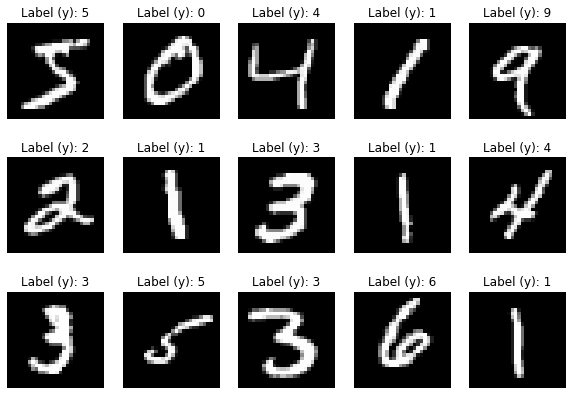

In [5]:
fig=plt.figure(figsize=(10,7))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1)
    ax.imshow(x_train[i],cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_train[i]))
    plt.axis('off')

In [6]:
x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_test.reshape(x_test.shape[0],28*28)
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [8]:
x_train=x_train[0:10000,:]
y_train=y_train[0:10000]
x_test=x_test[0:2000,:]
y_test=y_test[0:2000]

In [9]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10000, 784), (10000,), (2000, 784), (2000,))

In [10]:
# USING PIPELINE
pipe_1=Pipeline([('scaler',MinMaxScaler()),('classifier',SVC(kernel='linear',C=1))])
pipe_1.fit(x_train,y_train.ravel())

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=1, kernel='linear'))])

In [11]:
acc=cross_val_score(pipe_1,x_train,y_train.ravel(),cv=2)
print(acc.mean()*100)

91.07000000000001


In [12]:
?y_train.ravel

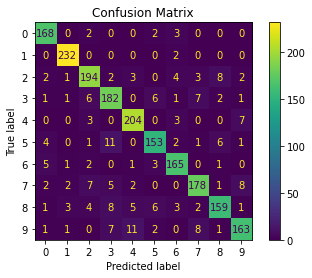

In [13]:
y_pred=pipe_1.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [14]:
CR=classification_report(y_test,y_pred)
print('Classification Report')
print(CR)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [15]:
# NON LINEAR SVM for MNIST MULTICLASS CLASSIFICATION

In [16]:
pipe_2=Pipeline([('scaler',MinMaxScaler()),('classifier',SVC(kernel='rbf',gamma=0.1,C=1))])
pipe_2.fit(x_train,y_train.ravel())
acc=cross_val_score(pipe_2,x_train,y_train.ravel(),cv=2)
print('Training Accuracy: {:.2f}%'.format(acc.mean()*100))

Training Accuracy: 82.87%


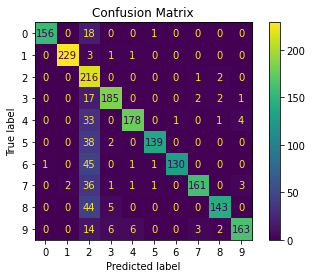

In [17]:
y_pred=pipe_2.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [18]:
CR=classification_report(y_test,y_pred)
print('Classification Report')
print(CR)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



In [20]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
C_range=np.logspace(-2,10,13)
gamma_range=np.logspace(-9,3,13)
param_grid=dict(gamma=gamma_range,C=C_range)
cv=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)
grid=GridSearchCV(SVC(kernel='rbf'),param_grid=param_grid,cv=cv)
grid.fit(x_train,y_train.ravel())
print(grid.best_params_,grid.best_score_)

KeyboardInterrupt: 

In [ ]:
# GRADED ASSIGNMENT

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X,y=load_iris(return_X_y=True)

In [ ]:
X.shape,y.shape

In [ ]:
kernels=['linear','rbf']
reg_rates=[1,15,25]
gamma='auto'
cv=4
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

In [ ]:
from sklearn.svm import SVC as model

In [ ]:
param_grid=dict(
    kernel=kernels,
    C=reg_rates,
        )
grid=GridSearchCV(model(gamma='auto',random_state=0),param_grid=param_grid,cv=cv)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
?model

In [ ]:
?train_test_split

In [ ]:
f=r'C:\Users\kabali\OneDrive\Desktop\Social_Network_Ads.csv'
data=pd.read_csv(f,header=0)

In [ ]:
X=data.iloc[:,0:2]
y=data.iloc[:,2]

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
svm=SVC(kernel='linear',random_state=0)

In [ ]:
svm.fit(x_train,y_train)

In [ ]:
print(classification_report(y_test,svm.predict(x_test)))

In [ ]:
confusion_matrix(y_test,svm.predict(x_test))

In [ ]:
from sklearn.datasets import fetch_openml
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)

In [ ]:
x=x.to_numpy()
y=y.to_numpy()

In [ ]:
x_train=x[0:20000,:]
y_train=y[0:20000]
x_test=x[20000:25000,:]
y_test=y[20000:25000]

In [ ]:
pipe=Pipeline([('scaler',MinMaxScaler()),('svc',SVC(kernel='linear',decision_function_shape='ovr',
                                                   class_weight=None))])


In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
y_pred=pipe.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred,average='macro'),recall_score(y_test,y_pred,average='macro'),f1_score(y_test,y_pred,average='macro')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)
pipe=Pipeline([('scaler',StandardScaler()),
              ('svm',SVC(kernel='poly',degree=3,decision_function_shape='ovr'
                        ,class_weight='balanced',C=10))])


In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
confusion_matrix(y_test,pipe.predict(x_test))

In [ ]:
print(classification_report(y_test,pipe.predict(x_test)))

In [ ]:
f1_score(y_test,pipe.predict(x_test),sample_weight='weighted')

In [ ]:
X,y=load_iris(return_X_y=True)

In [ ]:
X.shape,y.shape

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.svm import SVC as model
model=model(kernel='sigmoid',C=25,gamma='auto')
model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,model.predict(x_train))

In [ ]:
model.score(x_test,y_test)

In [ ]:
X.shape

In [ ]:
x,y=load_iris(return_X_y=True,as_frame=True)

In [ ]:
x.shape,y.shape

In [ ]:
np.unique(y)

In [ ]:
x.columns

In [ ]:
x.shape,y.shape

In [ ]:
sets_indx=np.where(y==0)
sets_indx

In [ ]:
type(y)
type(x)

In [ ]:
x=x.to_numpy()
y=y.to_numpy()

In [ ]:
x_d=np.delete(x,sets_indx,axis=0)
y_d=np.delete(y,sets_indx,axis=0)


In [ ]:
x_d.shape,y_d.shape

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_d,y_d,test_size=0.25,random_state=0)
pipe=Pipeline([('scaler',MinMaxScaler()),
              ('classifier',SVC())])

In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
precision_score(y_test,pipe.predict(x_test))

In [ ]:
precision_score(y_train,pipe.predict(x_train))

In [ ]:
## WEEK 9

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate,cross_val_score,train_test_split,ShuffleSplit,validation_curve,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_text

In [3]:
np.random.seed(306)

In [4]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

In [5]:
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
com_train_features,test_features,com_train_labels,test_labels=train_test_split(features,labels,random_state=42)

In [6]:
train_features,dev_features,train_labels,dev_labels=train_test_split(com_train_features,com_train_labels,random_state=42)

In [7]:
dt_reg_pipeline=Pipeline([('feature_scaling',StandardScaler()),
                         ('dt_reg',DecisionTreeRegressor(max_depth=3,random_state=42))])
dt_reg_cv_results=cross_validate(dt_reg_pipeline,com_train_features,com_train_labels,
                                cv=cv,scoring='neg_mean_absolute_error',return_train_score=True,return_estimator=True)
dt_reg_train_error=-1*dt_reg_cv_results['train_score']
dt_reg_test_error=-1*dt_reg_cv_results['test_score']
print("Mean Absolute of Train :{a:.3f}+/-{b:.3f}".format(a=dt_reg_train_error.mean(),b=dt_reg_train_error.std()))
print("Mean Absolute of Test : {a:.3f}+/-{b:.3f}".format(a=dt_reg_test_error.mean(),b=dt_reg_test_error.std()))

Mean Absolute of Train :0.590+/-0.005
Mean Absolute of Test : 0.593+/-0.007


In [8]:
## TREE VISUALIZING

In [9]:
# AS A TREE DIAGRAM
dt_reg_pipeline.fit(train_features,train_labels)


Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

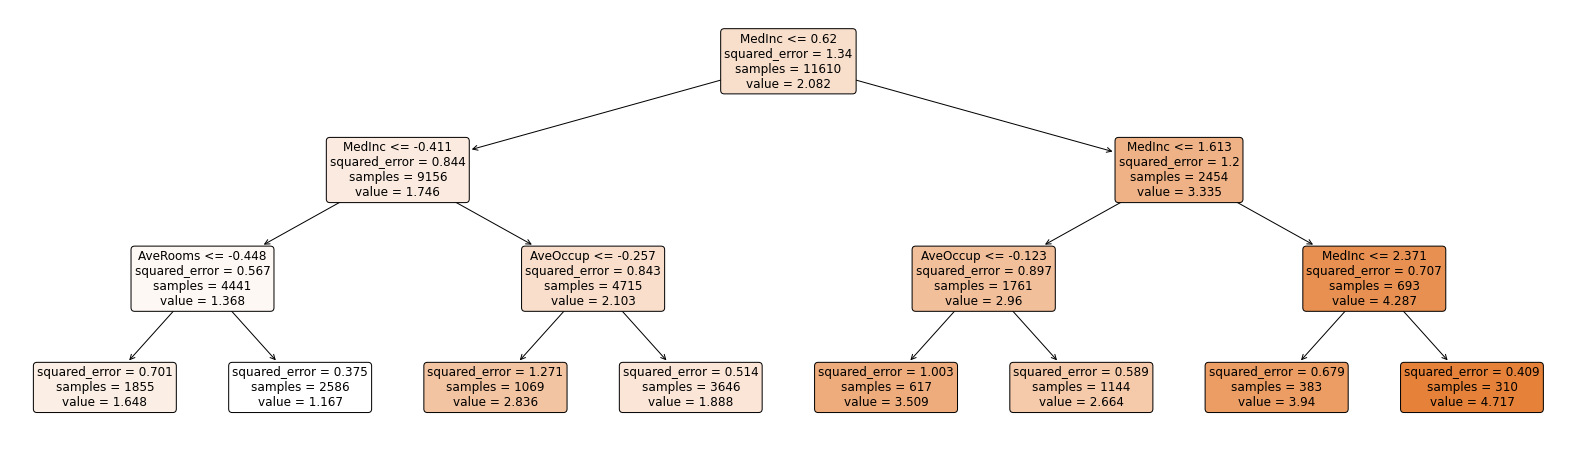

In [10]:
plt.figure(figsize=(28,8),facecolor='w')
a=tree.plot_tree(dt_reg_pipeline[-1],
                feature_names=features.columns,
                rounded=True,
                filled=True,
                fontsize=12)
plt.show()

In [11]:
# A TEXT BASED DIAGRAM
tree_rules=export_text(dt_reg_pipeline[-1])
print(tree_rules)

|--- feature_0 <= 0.62
|   |--- feature_0 <= -0.41
|   |   |--- feature_2 <= -0.45
|   |   |   |--- value: [1.65]
|   |   |--- feature_2 >  -0.45
|   |   |   |--- value: [1.17]
|   |--- feature_0 >  -0.41
|   |   |--- feature_5 <= -0.26
|   |   |   |--- value: [2.84]
|   |   |--- feature_5 >  -0.26
|   |   |   |--- value: [1.89]
|--- feature_0 >  0.62
|   |--- feature_0 <= 1.61
|   |   |--- feature_5 <= -0.12
|   |   |   |--- value: [3.51]
|   |   |--- feature_5 >  -0.12
|   |   |   |--- value: [2.66]
|   |--- feature_0 >  1.61
|   |   |--- feature_0 <= 2.37
|   |   |   |--- value: [3.94]
|   |   |--- feature_0 >  2.37
|   |   |   |--- value: [4.72]



In [12]:
# USING TREE FOR PREDICTION
test_labels_pred=dt_reg_pipeline.predict(test_features)

In [13]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_labels,test_labels_pred)
mse=mean_squared_error(test_labels,test_labels_pred)
r2=r2_score(test_labels,test_labels_pred)
print("MODEL PERFORMANCE ON TEST SET")
print("-------------------------------------------------")
print("MAE : ",mae)
print("MSE :",mse)
print("R2 SCORE :",r2)

MODEL PERFORMANCE ON TEST SET
-------------------------------------------------
MAE :  0.6005762942842664
MSE : 0.6417557936098145
R2 SCORE : 0.5150037690483743


In [14]:
param_grid={'dt_reg__max_depth':range(1,20),
            'dt_reg__min_samples_split':range(2,8)}
dt_grid_search=GridSearchCV(dt_reg_pipeline,param_grid=param_grid,
                           n_jobs=2,cv=cv,scoring='neg_mean_absolute_error',return_train_score=True)
dt_grid_search.fit(com_train_features,com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('dt_reg',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             n_jobs=2,
             param_grid={'dt_reg__max_depth': range(1, 20),
                         'dt_reg__min_samples_split': range(2, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [21]:
mean_train_error=-1*dt_grid_search.cv_results_['mean_train_score'][dt_grid_search.best_index_]
mean_test_error=-1*dt_grid_search.cv_results_['mean_test_score'][dt_grid_search.best_index_]
std_train_error=dt_grid_search.cv_results_['std_train_score'][dt_grid_search.best_index_]
std_test_error=dt_grid_search.cv_results_['std_test_score'][dt_grid_search.best_index_]

In [22]:
print("Train :{:.3f}+/- {:.3f}".format(mean_train_error,std_train_error))
print("Test :{:.3f}+/- {:.3f}".format(mean_test_error,std_test_error))

Train :0.278+/- 0.006
Test :0.428+/- 0.012


In [23]:
print("Mean CVed score of best estimator is: ",-1*dt_grid_search.best_score_)
print("The best param value is:",dt_grid_search.best_params_)

Mean CVed score of best estimator is:  0.4283313044233501
The best param value is: {'dt_reg__max_depth': 11, 'dt_reg__min_samples_split': 5}


In [24]:
dt_reg_pipeline.set_params(
dt_reg__max_depth=11,dt_reg__min_samples_split=5).fit(com_train_features,com_train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5,
                                       random_state=42))])

In [25]:
test_labels_pred=dt_reg_pipeline.predict(test_features)
mae=mean_absolute_error(test_labels,test_labels_pred)
mse=mean_squared_error(test_labels,test_labels_pred)
r2=r2_score(test_labels,test_labels_pred)
a=("THE MODEL PERFORMANCE FOR TESTING SET")
print(a)
print('-'*len(a))
print('MAE :',mae)
print('MSE :',mse)
print("R2 SCORE :",r2)

THE MODEL PERFORMANCE FOR TESTING SET
-------------------------------------
MAE : 0.4248952183820017
MSE : 0.4154957726373763
R2 SCORE : 0.6859960039130073


In [26]:
# DECISION TREE CLASSIFICATION ON ABALONE DATA

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
column_names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None,names=column_names)


In [33]:
type(abalone_data)

pandas.core.frame.DataFrame

In [34]:
abalone_data.shape

(4177, 9)

In [35]:
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


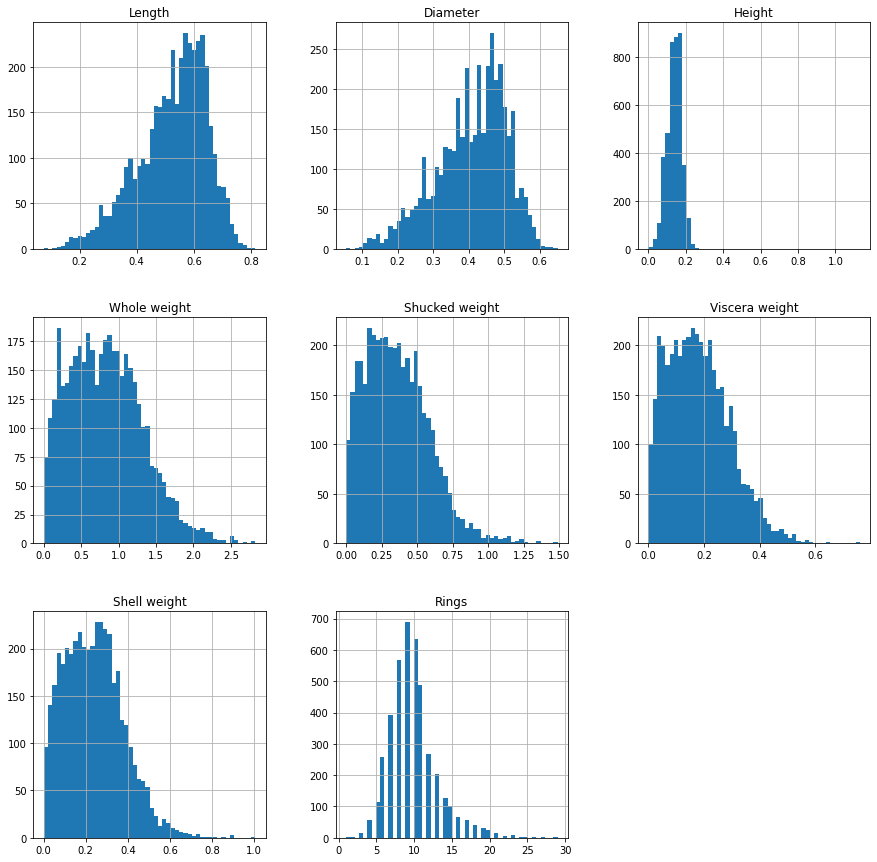

In [36]:
abalone_data.hist(bins=50,figsize=(15,15))
plt.show()

<Figure size 432x288 with 0 Axes>

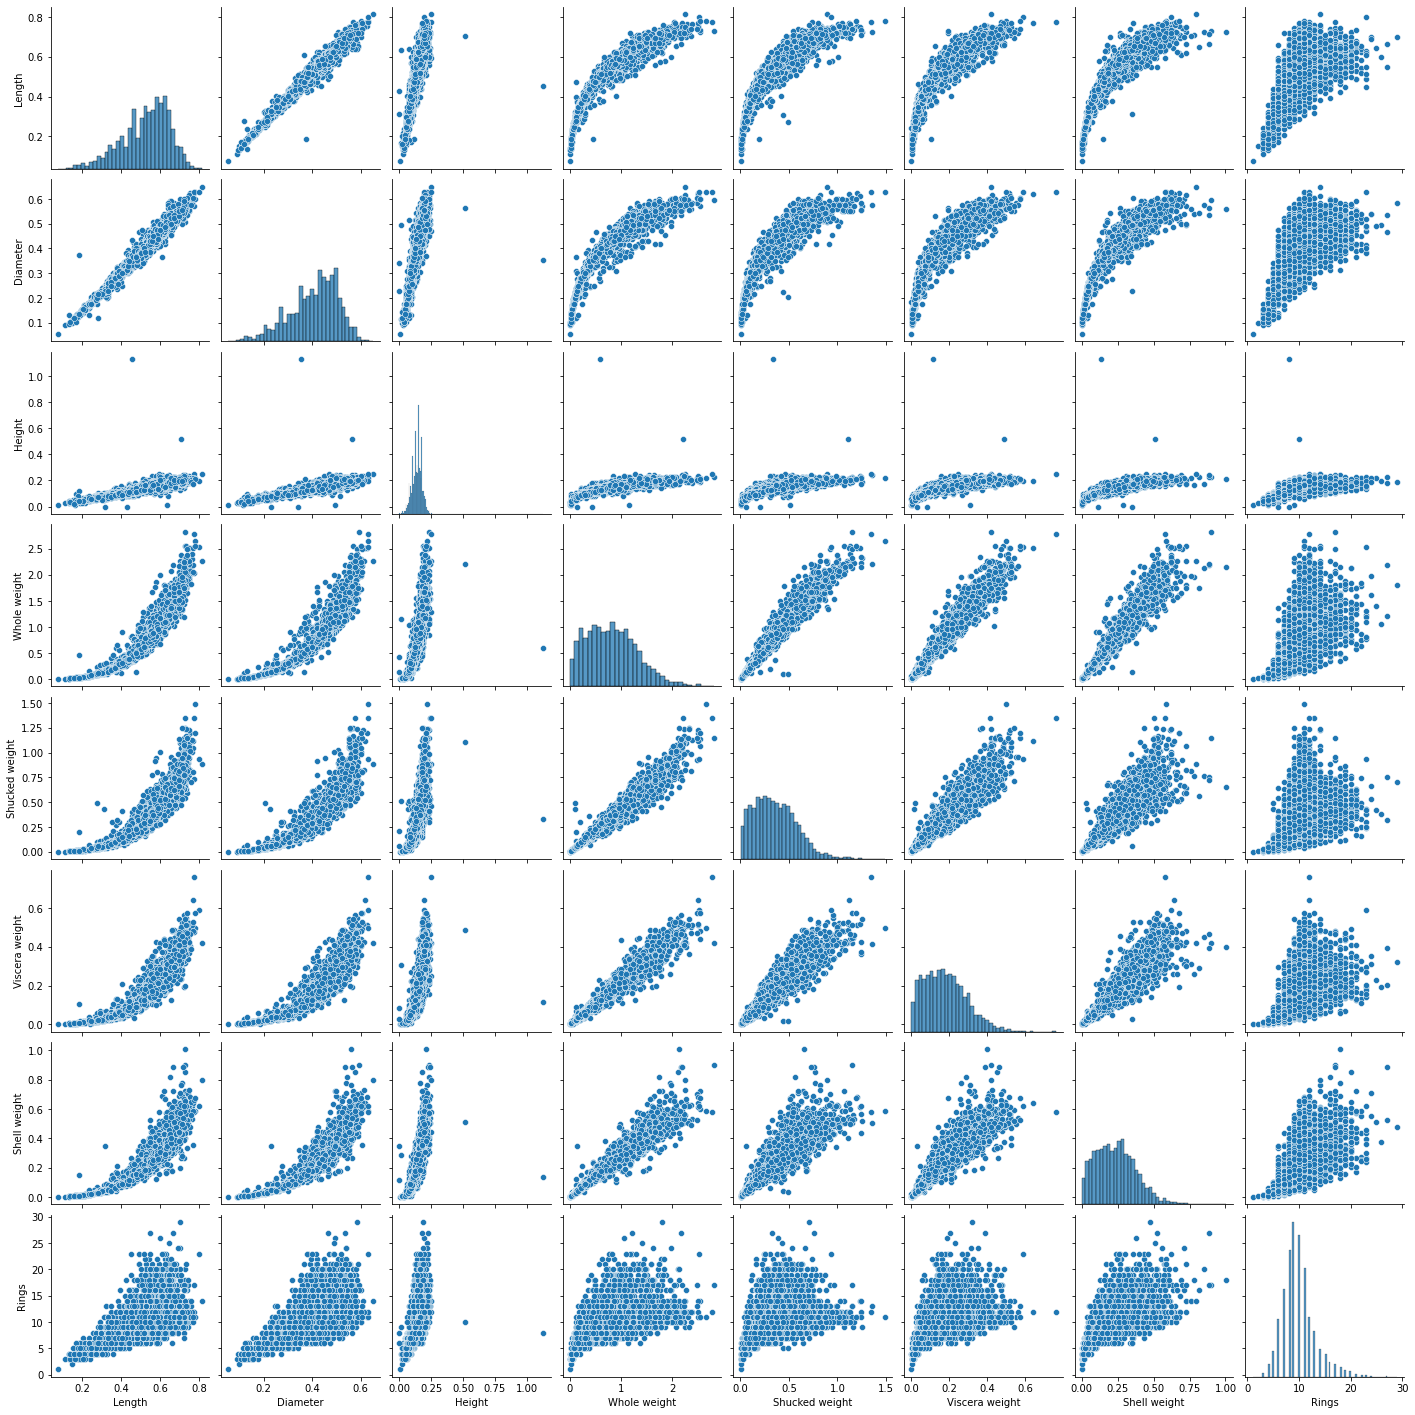

In [37]:
plt.figure()
sns.pairplot(abalone_data,diag_kind='hist')
plt.show()

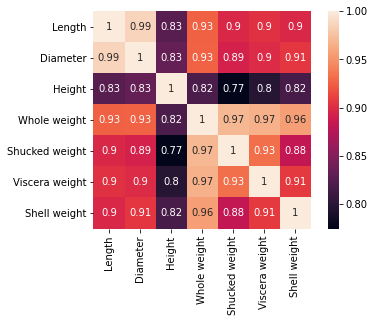

In [38]:
plt.figure()
sns.heatmap(abalone_data.iloc[:,:-1].corr(),annot=True,square=True)
plt.show()

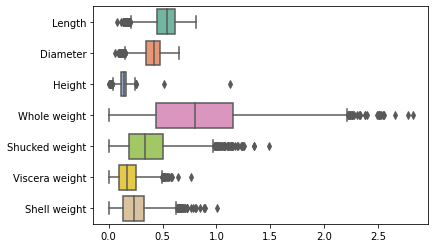

In [39]:
plt.figure()
sns.boxplot(data=abalone_data.iloc[:,:-1],orient='h',palette='Set2')
plt.show()

In [40]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [41]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [42]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [43]:
abalone_data['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [45]:
(abalone_data['Height']==0).sum() # DATA WHICH IS MISSING

2

In [46]:
abalone_data[abalone_data['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [47]:
means=pd.pivot_table(abalone_data,index=['Sex'],aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [48]:
X=abalone_data.iloc[:,:-1]
y=abalone_data.iloc[:,-1]

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [51]:
numeric_features=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
categorical_features=['Sex']

In [52]:
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(missing_values=0,strategy='constant',fill_value=0.107996)),
                                   ('scaler',StandardScaler())])

In [53]:
categorical_transformer=OneHotEncoder(handle_unknown='ignore')

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
?RandomForestClassifier
# ?SGDClassifier

In [54]:
preprocessor=ColumnTransformer(
transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])


In [55]:
clf=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(
    max_depth=3,random_state=42))
])

In [56]:
clf.fit(X_train,y_train)
print("model score: %.3f"%clf.score(X_test,y_test))

model score: 0.245


In [58]:
y_pred=clf.predict(X_test)

In [62]:
comparision=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1)
for each in comparision:
    print(each)

[10 13]
[8 8]
[10 11]
[4 5]
[10 12]
[10 11]
[9 7]
[8 8]
[7 7]
[10  9]
[7 8]
[5 8]
[ 9 11]
[8 9]
[5 4]
[10  7]
[9 7]
[10 17]
[10  7]
[7 7]
[7 7]
[7 5]
[8 8]
[9 9]
[10 10]
[10 10]
[4 5]
[11 15]
[ 8 10]
[10 14]
[9 8]
[4 4]
[10  9]
[11 13]
[7 7]
[8 7]
[7 8]
[10  9]
[7 8]
[10 11]
[ 8 15]
[ 8 12]
[ 8 17]
[10 16]
[10 11]
[ 8 11]
[9 8]
[10 10]
[10 11]
[7 6]
[10 13]
[7 7]
[ 9 13]
[11 20]
[ 8 12]
[9 7]
[5 8]
[ 9 10]
[7 7]
[7 7]
[10  9]
[9 9]
[ 9 11]
[7 8]
[7 7]
[11 12]
[11 13]
[10 17]
[8 8]
[11 12]
[8 9]
[11 17]
[10 10]
[8 6]
[ 8 11]
[8 8]
[10  8]
[8 9]
[10  8]
[8 8]
[10  8]
[5 6]
[7 7]
[10 13]
[ 8 11]
[7 6]
[10  9]
[11 12]
[4 5]
[7 6]
[ 9 11]
[ 8 11]
[9 8]
[7 7]
[10 16]
[5 8]
[ 8 11]
[9 8]
[10 18]
[10 11]
[10 12]
[ 8 14]
[10 12]
[10 11]
[5 6]
[10  9]
[7 7]
[7 6]
[ 7 11]
[10 11]
[11 11]
[11 12]
[ 8 20]
[ 9 10]
[10 14]
[11 10]
[10 10]
[10 12]
[5 4]
[ 8 12]
[7 7]
[10 13]
[7 6]
[8 8]
[10 17]
[10 15]
[10  9]
[10 11]
[7 7]
[10 11]
[10  8]
[9 7]
[8 7]
[10 10]
[11 11]
[10  9]
[ 8 10]
[8 9]
[7 8]
[11 16

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 14  0 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0 28  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0 56 13 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0 25 43 28 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 47 24 47  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 22 17 49 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 20 14 45 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 17  3 30 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8  2 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  0  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


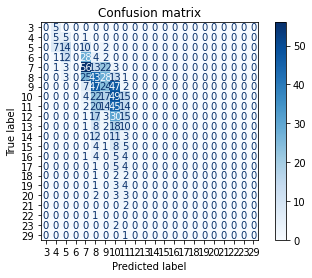

<Figure size 1152x1440 with 0 Axes>

In [68]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.figure(figsize=(16,20))
plt.show()

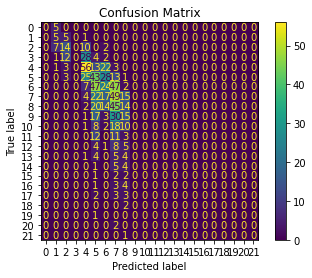

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_test_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_test_predicted)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,y_pred)
print('Classification report\n')
print(CR)

Classification report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.45      0.33        11
           5       0.38      0.42      0.40        33
           6       0.00      0.00      0.00        47
           7       0.41      0.57      0.48        98
           8       0.21      0.38      0.27       113
           9       0.21      0.19      0.20       127
          10       0.20      0.46      0.28       107
          11       0.16      0.15      0.16        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
    

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [71]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
print(type(acc))
print('Accuracy of each fold',list(acc*100))
print('Accuracy {:.2f} %'.format(acc.mean()*100))

<class 'numpy.ndarray'>
Accuracy of each fold [27.46268656716418, 22.45508982035928, 23.952095808383234, 24.550898203592812, 24.251497005988025, 23.952095808383234, 25.449101796407188, 30.83832335329341, 26.34730538922156, 26.047904191616766]
Accuracy 25.53 %


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


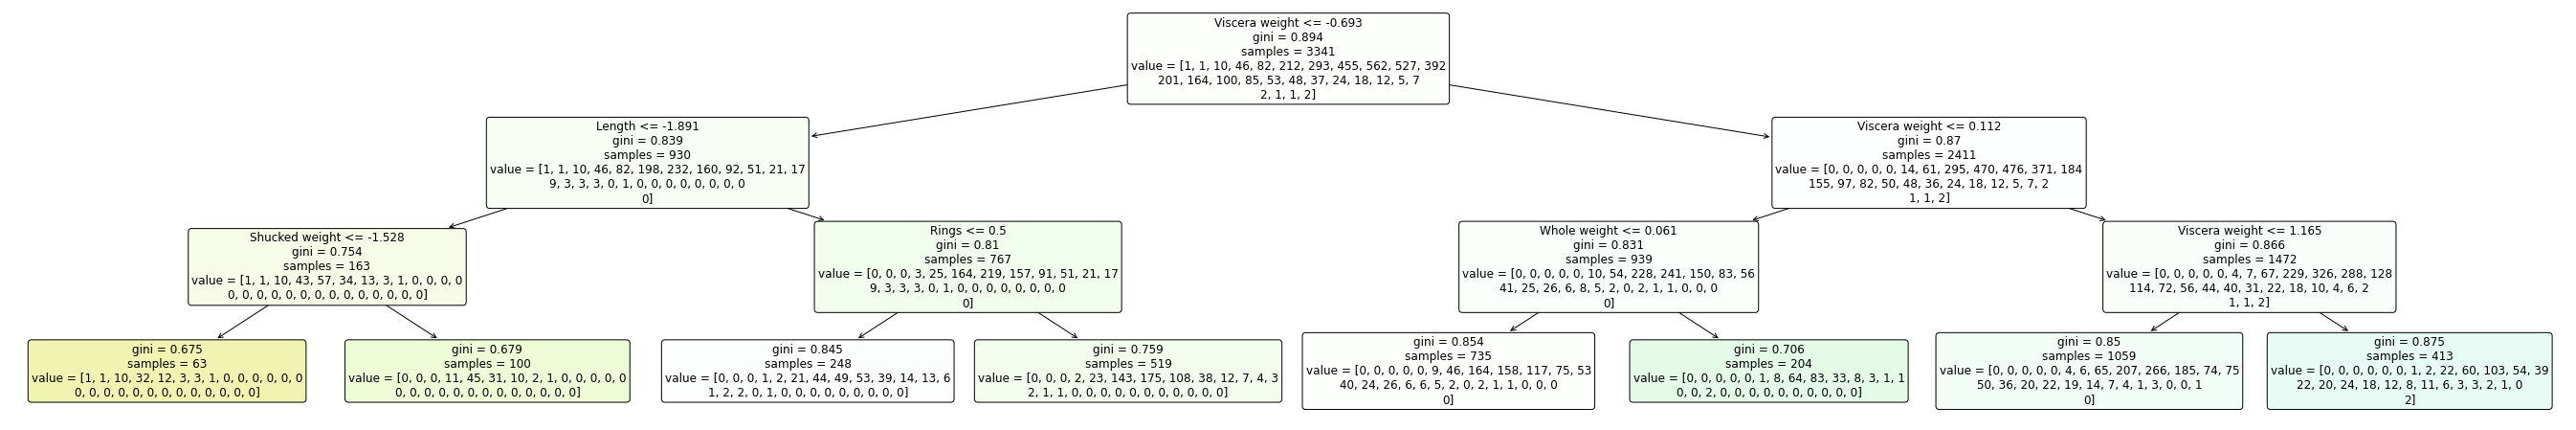

In [72]:
from sklearn import tree
plt.figure(figsize=(48,8),facecolor='w')
a=tree.plot_tree(clf['classifier'],feature_names=column_names,rounded=True,
                filled=True,fontsize=12)

In [73]:
# FINDING BEST PARAMS USING GRIDSEARCHCV
X_train_new=preprocessor.fit_transform(X_train)

In [77]:
from sklearn.model_selection import GridSearchCV
tuned_params=[{'max_depth':range(1,10),
              'min_samples_split':range(2,11,2)}]
scores=['recall']
for score in scores:
    print()
    print(f'Tuning hyperparams for {score}')
    print()
    clf_CV=GridSearchCV(DecisionTreeClassifier(),tuned_params,scoring=f'{score}_macro')
    clf_CV.fit(X_train_new,y_train)
    print("Best parameters:")
    print()
    print(clf_CV.best_params_)
    print()
    print("Grid Scores:")
    means=clf_CV.cv_results_['mean_test_score']
    stds=clf_CV.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,clf_CV.cv_results_['params']):
        print(f"{mean:0.3f}(+/-{std*2:0.03f}) for {params}")


Tuning hyperparams for recall



C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being se

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters:

{'max_depth': 5, 'min_samples_split': 6}

Grid Scores:
0.073(+/-0.009) for {'max_depth': 1, 'min_samples_split': 2}
0.073(+/-0.009) for {'max_depth': 1, 'min_samples_split': 4}
0.073(+/-0.009) for {'max_depth': 1, 'min_samples_split': 6}
0.073(+/-0.009) for {'max_depth': 1, 'min_samples_split': 8}
0.073(+/-0.009) for {'max_depth': 1, 'min_samples_split': 10}
0.107(+/-0.011) for {'max_depth': 2, 'min_samples_split': 2}
0.107(+/-0.011) for {'max_depth': 2, 'min_samples_split': 4}
0.107(+/-0.011) for {'max_depth': 2, 'min_samples_split': 6}
0.107(+/-0.011) for {'max_depth': 2, 'min_samples_split': 8}
0.107(+/-0.011) for {'max_depth': 2, 'min_samples_split': 10}
0.131(+/-0.012) for {'max_depth': 3, 'min_samples_split': 2}
0.131(+/-0.012) for {'max_depth': 3, 'min_samples_split': 4}
0.131(+/-0.012) for {'max_depth': 3, 'min_samples_split': 6}
0.131(+/-0.012) for {'max_depth': 3, 'min_samples_split': 8}
0.131(+/-0.012) for {'max_depth': 3, 'min_samples_split': 10}
0.134(+/-

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
clf2=Pipeline(steps=[('preprocessor',preprocessor),
                    ('classifier',DecisionTreeClassifier(max_depth=5,min_samples_split=4,random_state=42))])

In [79]:
clf2.fit(X_train,y_train)
print("Model score:%.3f"%clf2.score(X_test,y_test))

Model score:0.272


In [80]:
abalone_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [81]:
# DECISION TREE FOR CLASSIFICATION ON IRIS DATASET

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [83]:
features,labels=load_iris(return_X_y=True,as_frame=True)

In [84]:
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.2,random_state=42)

In [85]:
dt_pipeline=Pipeline(steps=[
    ('feature_scaling',MinMaxScaler()),
    ('dt_classifier',DecisionTreeClassifier(max_depth=3,
                                           random_state=42))
])

In [86]:
dt_pipeline.fit(train_features,train_labels)

Pipeline(steps=[('feature_scaling', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

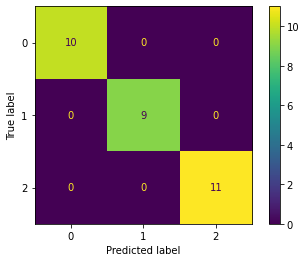

In [87]:
ConfusionMatrixDisplay.from_estimator(dt_pipeline,test_features,test_labels)

In [88]:
print(classification_report(test_labels,dt_pipeline.predict(test_features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
data=load_iris()

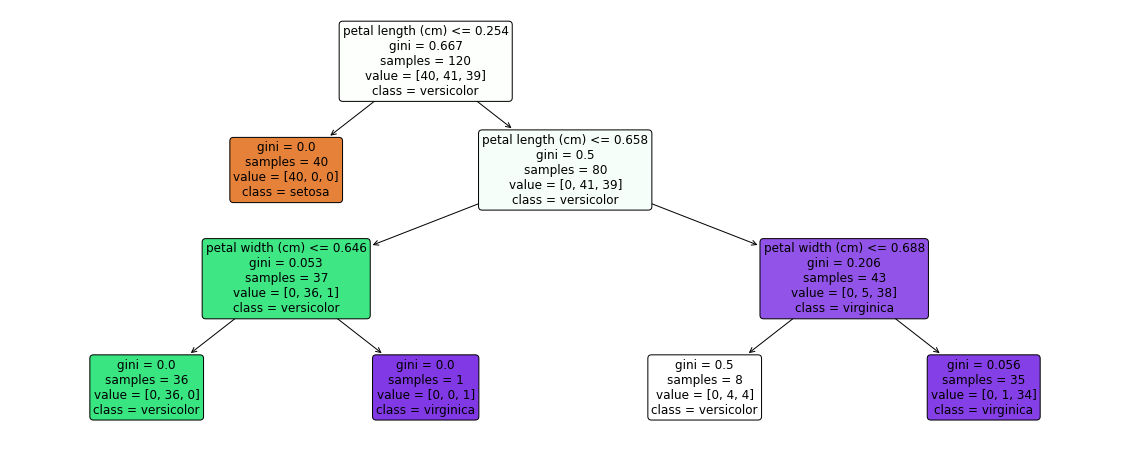

In [90]:
plt.figure(figsize=(20,8),facecolor='w')
a=tree.plot_tree(dt_pipeline[-1],feature_names=features.columns,
                class_names=data.target_names,rounded=True,filled=True,fontsize=12)
plt.show()

In [91]:
tree_rules=export_text(dt_pipeline[-1],feature_names=list(features.columns))
print(tree_rules)

|--- petal length (cm) <= 0.25
|   |--- class: 0
|--- petal length (cm) >  0.25
|   |--- petal length (cm) <= 0.66
|   |   |--- petal width (cm) <= 0.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.66
|   |   |--- petal width (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.69
|   |   |   |--- class: 2



In [92]:
importance=pd.DataFrame({'feature':features.columns,
                        'importance':np.round(dt_pipeline[-1].feature_importances_,3)})
importance.sort_values('importance',ascending=False,inplace=True)
print(importance)

             feature  importance
2  petal length (cm)       0.935
3   petal width (cm)       0.065
0  sepal length (cm)       0.000
1   sepal width (cm)       0.000


In [93]:
hp_grid=[{'dt_classifier__max_depth':range(1,6),
         'dt_classifier__min_samples_split':range(2,11,2)}]
gs_clf=GridSearchCV(dt_pipeline,hp_grid,scoring='f1_macro')
gs_clf.fit(train_features,train_labels)
print("Best parameters :")
print()
print(gs_clf.best_params_)
print()
print('Grid scores: ')
means=gs_clf.cv_results_['mean_test_score']
std=gs_clf.cv_results_['std_test_score']
for mean,std,params in zip(means,std,gs_clf.cv_results_['params']):
    print(mean,std,' for',params)

Best parameters :

{'dt_classifier__max_depth': 4, 'dt_classifier__min_samples_split': 2}

Grid scores: 
0.559111111111111 0.0071111111111111566  for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 2}
0.559111111111111 0.0071111111111111566  for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 4}
0.559111111111111 0.0071111111111111566  for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 6}
0.559111111111111 0.0071111111111111566  for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 8}
0.559111111111111 0.0071111111111111566  for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 10}
0.916065792938858 0.045340507280153944  for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}
0.916065792938858 0.045340507280153944  for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 4}
0.916065792938858 0.045340507280153944  for {'dt_classifier__max_depth': 2, 'dt_clas

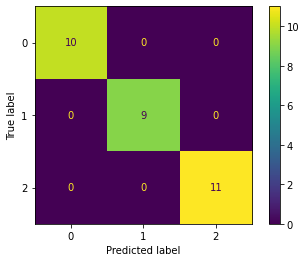

In [94]:
ConfusionMatrixDisplay.from_estimator(gs_clf.best_estimator_,test_features,test_labels)

In [99]:
#?export_text

In [97]:
# GRADED ASSIGNMENT - 9

In [113]:
X_graded,y_graded=load_iris(return_X_y=True,as_frame=True)

In [114]:
x_gr_train,x_gr_test,y_gr_train,y_gr_test=train_test_split(X_graded,y_graded,test_size=0.3,random_state=1)

In [115]:
# param_grid={'dt_reg__max_depth':range(1,20),
#             'dt_reg__min_samples_split':range(2,8)}
# dt_grid_search=GridSearchCV(dt_reg_pipeline,param_grid=param_grid,
#                            n_jobs=2,cv=cv,scoring='neg_mean_absolute_error',return_train_score=True)
# dt_grid_search.fit(com_train_features,com_train_labels)

param_grid={'criterion':['entropy','gini'],
           'splitter':['random','best'],
           'min_samples_leaf':range(2,11,2),
           'max_depth':range(3,7)}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid=param_grid,cv=4,return_train_score=True)
grid_search.fit(x_gr_train,y_gr_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(2, 11, 2),
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [116]:
grid_search.score(x_gr_train,y_gr_train)

0.9809523809523809

In [117]:
grid_search.score(x_gr_test,y_gr_test)

0.9555555555555556

In [118]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [119]:
from sklearn.datasets import load_diabetes
X_graded,y_graded=load_diabetes(return_X_y=True,as_frame=True)
x_gr_train,x_gr_test,y_gr_train,y_gr_test=train_test_split(X_graded,y_graded,test_size=0.3,random_state=1)


In [120]:
reg=DecisionTreeRegressor(random_state=1,criterion='squared_error',
                         splitter='random',max_leaf_nodes=10)
reg.fit(x_gr_train,y_gr_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [121]:
reg.score(x_gr_train,y_gr_train)

0.5032060624566737

In [122]:
reg.score(x_gr_test,y_gr_test)

0.218771375137222

[Text(103.01538461538462, 201.90857142857143, 'X[2] <= -0.045\nsquared_error = 6302.895\nsamples = 309\nvalue = 154.065'),
 Text(77.26153846153846, 170.84571428571428, 'squared_error = 1343.27\nsamples = 48\nvalue = 89.646'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= -0.008\nsquared_error = 6311.475\nsamples = 261\nvalue = 165.912'),
 Text(51.50769230769231, 139.78285714285715, 'X[7] <= 0.025\nsquared_error = 3253.924\nsamples = 96\nvalue = 115.615'),
 Text(25.753846153846155, 108.72, 'squared_error = 2446.901\nsamples = 72\nvalue = 101.625'),
 Text(77.26153846153846, 108.72, 'squared_error = 3326.493\nsamples = 24\nvalue = 157.583'),
 Text(206.03076923076924, 139.78285714285715, 'X[8] <= -0.005\nsquared_error = 5762.145\nsamples = 165\nvalue = 195.176'),
 Text(128.76923076923077, 108.72, 'X[6] <= -0.016\nsquared_error = 4794.095\nsamples = 47\nvalue = 148.106'),
 Text(103.01538461538462, 77.65714285714284, 'squared_error = 2804.102\nsamples = 14\nvalue = 192.429'),
 Text(

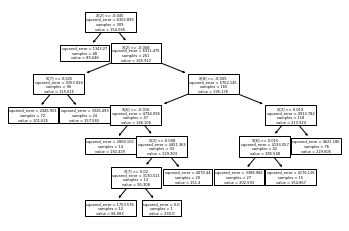

In [123]:
from sklearn import tree
tree.plot_tree(reg)

In [130]:
x_gr_train[x_gr_train.iloc[:,2]<=-0.045].size

500

In [131]:
x_gr_train[x_gr_train.iloc[:,2]>-0.045].size

2590

In [132]:
500/2590

0.19305019305019305

In [134]:
param_grid={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'splitter':['random','best'],
           'max_features':['auto','sqrt','log2'],
           'ccp_alpha':[0.001,0.01,0.02,0.05]}
grid=GridSearchCV(DecisionTreeRegressor(random_state=1),cv=4,
                 param_grid=param_grid)
grid.fit(x_gr_train,y_gr_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']})

In [135]:
grid.score(x_gr_test,y_gr_test)

-0.33048837757332206

In [136]:
grid.best_params_

{'ccp_alpha': 0.05,
 'criterion': 'absolute_error',
 'max_features': 'sqrt',
 'splitter': 'best'}